# Pré-configuração

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
pd.options.display.float_format = "{:.3f}".format

In [3]:
# diretório das bases
PATH = r'C:\Users\rafsa\OneDrive\Documentos\01 Microcenso Educação Superior\Bases\Microdados_Educacao_Superior_2018\dados'

# Leitura das bases

In [4]:
# Leitura da base ALUNO
file = '\DM_ALUNO.CSV'
df_aluno = pd.DataFrame()

start = time.time()

for chunk in pd.read_csv(PATH+file, sep='|', dtype={10: str, 11: str}, chunksize=250000):
    df_aluno = pd.concat([df_aluno, chunk.query('IN_FINANCIAMENTO_ESTUDANTIL == 1 & TP_SITUACAO != 2')])
    
end = time.time()  
print("Concatenando os pedaços no DataFrame: ",(end-start),"seg")

Concatenando os pedaços no DataFrame:  90.79481720924377 seg


In [5]:
# Leitura da base CINE
file = '\TB_AUX_CINE_BRASIL.CSV'

df_cine = pd.read_csv(PATH+file, sep='|', encoding='ansi')

# Análise Exploratória

## Frequência das variáveis qualitativas

In [6]:
for q in df_aluno.columns:
    print(df_aluno[q].value_counts(normalize=True))
    print('\n')

2018   1.000
Name: NU_ANO_CENSO, dtype: float64


163     0.131
298     0.094
1270    0.034
316     0.016
1107    0.015
         ... 
1131    0.000
16967   0.000
14097   0.000
18671   0.000
19945   0.000
Name: CO_IES, Length: 1747, dtype: float64


4   0.761
5   0.234
3   0.003
7   0.002
Name: TP_CATEGORIA_ADMINISTRATIVA, dtype: float64


1   0.435
3   0.294
2   0.270
Name: TP_ORGANIZACAO_ACADEMICA, dtype: float64


89380     0.014
97980     0.013
121297    0.010
1268023   0.008
97992     0.007
           ... 
1204127   0.000
97596     0.000
1364516   0.000
1304867   0.000
110207    0.000
Name: CO_CURSO, Length: 21258, dtype: float64


18683.000    0.002
15325.000    0.002
15354.000    0.001
15348.000    0.001
15330.000    0.001
              ... 
638801.000   0.000
390067.000   0.000
661096.000   0.000
121777.000   0.000
283570.000   0.000
Name: CO_CURSO_POLO, Length: 44368, dtype: float64


3.000   0.722
1.000   0.218
4.000   0.035
2.000   0.026
Name: TP_TURNO, dtype: float64


1.000

## Frequência das variáveis quantitativas

### QT_CARGA_HORARIA_TOTAL

In [7]:
pd.DataFrame(df_aluno['QT_CARGA_HORARIA_TOTAL'].describe())

,QT_CARGA_HORARIA_TOTAL
count,1217795.000
mean,3378.427
std,945.791
min,840.000
25%,3000.000
50%,3420.000
75%,3971.000
max,12690.000


In [8]:
# Coeficiente de variação
cv = (df_aluno['QT_CARGA_HORARIA_TOTAL'].std() / df_aluno['QT_CARGA_HORARIA_TOTAL'].mean()) * 100
print("Coeficiente de variação:", cv)

Coeficiente de variação: 27.995015564093833


Text(0, 0.5, 'Quantidade')

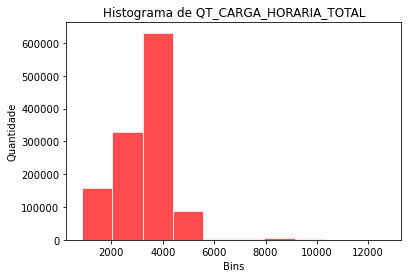

In [9]:
# Histograma
df_aluno['QT_CARGA_HORARIA_TOTAL'].hist(bins=10, color='red', alpha=0.7, 
                  grid=False, edgecolor='white', linewidth=1)
plt.title('Histograma de QT_CARGA_HORARIA_TOTAL' )
plt.xlabel('Bins')
plt.ylabel('Quantidade')

<AxesSubplot:>

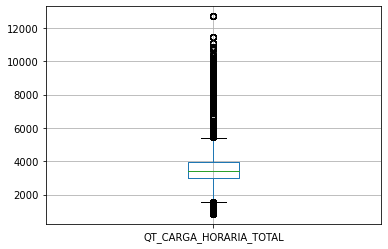

In [10]:
df_aluno.boxplot(column='QT_CARGA_HORARIA_TOTAL')

### QT_CARGA_HORARIA_INTEG

In [11]:
pd.DataFrame(df_aluno['QT_CARGA_HORARIA_INTEG'].describe())

,QT_CARGA_HORARIA_INTEG
count,1217795.000
mean,1775.764
std,1648.962
min,0.000
25%,290.000
50%,1260.000
75%,3220.000
max,14832.000


In [12]:
# Coeficiente de variação
cv = (df_aluno['QT_CARGA_HORARIA_INTEG'].std() / df_aluno['QT_CARGA_HORARIA_INTEG'].mean()) * 100
print("Coeficiente de variação:", cv)

Coeficiente de variação: 92.85932319967696


Text(0, 0.5, 'Quantidade')

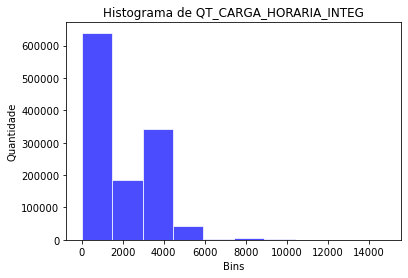

In [13]:
# Histograma
df_aluno['QT_CARGA_HORARIA_INTEG'].hist(bins=10, color='blue', alpha=0.7, 
                  grid=False, edgecolor='white', linewidth=1)
plt.title('Histograma de QT_CARGA_HORARIA_INTEG' )
plt.xlabel('Bins')
plt.ylabel('Quantidade')

<AxesSubplot:>

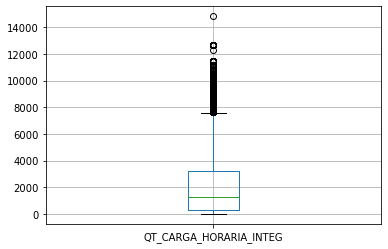

In [14]:
df_aluno.boxplot(column='QT_CARGA_HORARIA_INTEG')

### NU_IDADE

In [15]:
pd.DataFrame(df_aluno['NU_IDADE'].describe())

,NU_IDADE
count,1217795.000
mean,28.651
std,8.402
min,15.000
25%,22.000
50%,26.000
75%,33.000
max,94.000


Text(0, 0.5, 'Quantidade')

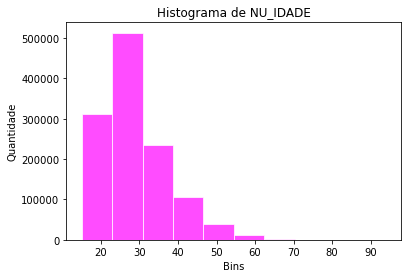

In [16]:
# Histograma
df_aluno['NU_IDADE'].hist(bins=10, color='magenta', alpha=0.7, 
                  grid=False, edgecolor='white', linewidth=1)
plt.title('Histograma de NU_IDADE')
plt.xlabel('Bins')
plt.ylabel('Quantidade')

In [17]:
# Coeficiente de variação
cv = (df_aluno['NU_IDADE'].std() / df_aluno['NU_IDADE'].mean()) * 100
print("Coeficiente de variação:", cv)

Coeficiente de variação: 29.325290341726017


<AxesSubplot:>

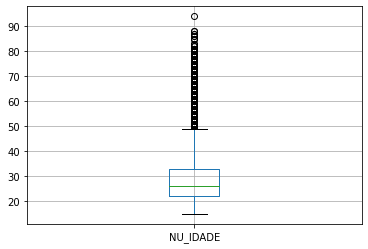

In [18]:
df_aluno.boxplot(column='NU_IDADE')

# Estudo das variáveis

## Identificação das colunas da base

In [19]:
# Variável identificadora do registro
key_vars = ['CO_ALUNO_CURSO']

# A serem desconsideradas
drop_vars = [
    'CO_IES', 'CO_CURSO', 'CO_CURSO_POLO', 'TP_NIVEL_ACADEMICO', 'ID_ALUNO',  
    'NU_ANO_NASCIMENTO', 'NU_MES_NASCIMENTO', 'NU_DIA_NASCIMENTO', 'CO_PAIS_ORIGEM', 'CO_UF_NASCIMENTO', 
    'CO_MUNICIPIO_NASCIMENTO', 'TP_SITUACAO', 'DT_INGRESSO_CURSO', 'TP_SEMESTRE_CONCLUSAO', 'TP_SEMESTRE_REFERENCIA', 
    'CO_IES_DESTINO', 'CO_PAIS_DESTINO', 'IN_ALUNO_PARFOR', 'TP_NACIONALIDADE', 'IN_BOLSA_ESTAGIO', 
    'IN_BOLSA_EXTENSAO', 'IN_BOLSA_MONITORIA', 'IN_BOLSA_PESQUISA', 'IN_APOIO_ALIMENTACAO', 'IN_APOIO_BOLSA_PERMANENCIA', 
    'IN_APOIO_BOLSA_TRABALHO', 'IN_APOIO_MATERIAL_DIDATICO', 'IN_APOIO_MORADIA', 'IN_APOIO_TRANSPORTE',
    'IN_COMPLEMENTAR_ESTAGIO', 'IN_COMPLEMENTAR_EXTENSAO', 'IN_COMPLEMENTAR_MONITORIA', 'IN_COMPLEMENTAR_PESQUISA',
    'IN_RESERVA_ETNICO', 'IN_RESERVA_DEFICIENCIA', 'IN_RESERVA_ENSINO_PUBLICO',
    'IN_RESERVA_RENDA_FAMILIAR', 'IN_RESERVA_OUTRA', 'IN_INGRESSO_TOTAL', 
    'IN_INGRESSO_PROCESSO_SELETIVO', 'IN_INGRESSO_VAGA_NOVA', 'IN_DEFICIENCIA_AUDITIVA', 
    'IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_INTELECTUAL', 'IN_DEFICIENCIA_MULTIPLA', 
    'IN_DEFICIENCIA_SURDEZ', 'IN_DEFICIENCIA_SURDOCEGUEIRA', 'IN_DEFICIENCIA_BAIXA_VISAO',
    'IN_DEFICIENCIA_CEGUEIRA', 'IN_DEFICIENCIA_SUPERDOTACAO', 'IN_TGD_AUTISMO', 'IN_TGD_SINDROME_ASPERGER',
    'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO', 'TP_MOBILIDADE_ACADEMICA', 'TP_MOBILIDADE_ACADEMICA_INTERN',
    'IN_FINANCIAMENTO_ESTUDANTIL', 'QT_CARGA_HORARIA_INTEG', 'IN_MATRICULA', 'TP_MODALIDADE_ENSINO']

# A ser agrupada
to_be_grouped_vars = ['CO_CINE_ROTULO']

# Categóricas
cat_vars = [
    'TP_CATEGORIA_ADMINISTRATIVA', 'TP_ORGANIZACAO_ACADEMICA', 'TP_TURNO', 'TP_GRAU_ACADEMICO', 
    'TP_COR_RACA',  'TP_ESCOLA_CONCLUSAO_ENS_MEDIO']

# Catégorica com dois valores
cat_vars_bool = ['TP_SEXO']

# Numéricas
num_vars = ['QT_CARGA_HORARIA_TOTAL', 'NU_IDADE']

# Tipo de Ingresso
ingresso_vars = ['IN_INGRESSO_VESTIBULAR', 'IN_INGRESSO_ENEM'] 

# Outros Tipos de Ingresso
ingresso_outros_vars = [    
    'IN_INGRESSO_AVALIACAO_SERIADA', 'IN_INGRESSO_SELECAO_SIMPLIFICA',
    'IN_INGRESSO_OUTRO_TIPO_SELECAO', 'IN_INGRESSO_VAGA_REMANESC', 'IN_INGRESSO_VAGA_PROG_ESPECIAL',
    'IN_INGRESSO_TRANSF_EXOFFICIO', 'IN_INGRESSO_DECISAO_JUDICIAL', 'IN_INGRESSO_CONVENIO_PECG',
    'IN_INGRESSO_EGRESSO', 'IN_INGRESSO_OUTRA_FORMA']

# Tipo de Financiamento
financ_vars = [
    'IN_FIN_REEMB_FIES', 'IN_FIN_REEMB_PROG_IES', 
    'IN_FIN_NAOREEMB_PROUNI_INTEGR', 'IN_FIN_NAOREEMB_PROUNI_PARCIAL', 'IN_FIN_NAOREEMB_PROG_IES']

# Outro Tipo de Financiamento Reembolsável
financ_reemb_outro_vars = [
    'IN_FIN_REEMB_ESTADUAL', 'IN_FIN_REEMB_MUNICIPAL',
    'IN_FIN_REEMB_ENT_EXTERNA', 'IN_FIN_REEMB_OUTRA']

# Outro Tipo de Financiamento Não Reembolsável
financ_nao_reemb_outro_vars = [
    'IN_FIN_NAOREEMB_ESTADUAL', 'IN_FIN_NAOREEMB_MUNICIPAL',
    'IN_FIN_NAOREEMB_ENT_EXTERNA', 'IN_FIN_NAOREEMB_OUTRA']

# Variáveis Derivadas
deriv_vars = [
    'IN_DEFICIENCIA', 'IN_RESERVA_VAGAS', 
    'IN_APOIO_SOCIAL', 'IN_ATIVIDADE_EXTRACURRICULAR', 'IN_MOBILIDADE_ACADEMICA']

# A serem usadas para a criação de novas variáveis
new_features_vars = ['NU_ANO_CENSO', 'NU_ANO_INGRESSO', 'CO_ALUNO_CURSO_ORIGEM']

# A serem usadas para o registro das novas variáveis
created_vars = []

# Variável resposta (target)
target = ['IN_CONCLUINTE']

# Total de colunas
(len(key_vars) + len(drop_vars) + len(to_be_grouped_vars) + len(cat_vars) +len(cat_vars_bool) + len(num_vars) 
+ len(ingresso_vars) + len(ingresso_outros_vars) + len(financ_vars) + len(financ_reemb_outro_vars) + len(financ_nao_reemb_outro_vars)
+ len(deriv_vars) + len(new_features_vars) + len(target))

105

# ABT

## Unificando os alunos com mais de uma matricula no curso mais antigo


In [20]:
df_aluno = df_aluno.sort_values('NU_ANO_INGRESSO')
df_aluno.drop_duplicates(subset=['ID_ALUNO'], keep='first', inplace=True)
df_aluno.shape

(1193836, 105)

## Criação da versão inicial da ABT

In [21]:
# Descartando colunas iniciais
df_abt_aluno = df_aluno.drop(columns=drop_vars)

## Agrupando as variáveis de Ingresso

In [22]:
# Agrupando os outros tipos de ingresso
df_abt_aluno['IN_INGRESSO_OUTRO'] = np.where(df_abt_aluno[ingresso_outros_vars].sum(axis=1) > 0.0, 1, 0)
df_abt_aluno.drop(columns=ingresso_outros_vars, inplace=True)

# acrescentando o metadado da nova variável
created_vars.append('IN_INGRESSO_OUTRO')

df_abt_aluno[ingresso_vars+['IN_INGRESSO_OUTRO']].head()

,IN_INGRESSO_VESTIBULAR,IN_INGRESSO_ENEM,IN_INGRESSO_OUTRO
3495536,1,0,0
3495014,0,0,1
460499,1,0,0
4850478,1,0,0
4581343,1,0,0


## Agrupando as variáveis de Financiamento

In [23]:
# Agrupando os outros tipos de financiamento
df_abt_aluno = (
    df_abt_aluno
    .assign(
        IN_FIN_REEMB_OUTRO = np.where(df_aluno[financ_reemb_outro_vars].sum(axis=1) > 0.0, 1.0, 0.0),
        IN_FIN_NAO_REEMB_OUTRO = np.where(df_aluno[financ_nao_reemb_outro_vars].sum(axis=1) > 0.0, 1.0, 0.0)
    )
)

df_abt_aluno.drop(columns=financ_reemb_outro_vars+financ_nao_reemb_outro_vars, inplace=True)

[created_vars.append(c) for c in ['IN_FIN_REEMB_OUTRO', 'IN_FIN_NAO_REEMB_OUTRO']]

df_abt_aluno[financ_vars+['IN_FIN_REEMB_OUTRO', 'IN_FIN_NAO_REEMB_OUTRO']].head()

,IN_FIN_REEMB_FIES,IN_FIN_REEMB_PROG_IES,IN_FIN_NAOREEMB_PROUNI_INTEGR,IN_FIN_NAOREEMB_PROUNI_PARCIAL,IN_FIN_NAOREEMB_PROG_IES,IN_FIN_REEMB_OUTRO,IN_FIN_NAO_REEMB_OUTRO
3495536,0.000,0.000,0.000,0.000,1.000,0.000,0.000
3495014,0.000,0.000,0.000,0.000,1.000,0.000,0.000
460499,0.000,1.000,0.000,0.000,0.000,0.000,0.000
4850478,1.000,0.000,0.000,0.000,1.000,1.000,1.000
4581343,0.000,0.000,0.000,0.000,1.000,0.000,0.000


## Criando a feature CINE Área Geral

In [24]:
# Criando a feature NO_CINE_AREA_GERAL
df_abt_aluno = (
    df_abt_aluno
    .merge(df_cine[['CO_CINE_ROTULO', 'CO_CINE_AREA_GERAL']], how='left', on='CO_CINE_ROTULO')
)

# acrescentando o metadado da nova variável
created_vars.append('CO_CINE_AREA_GERAL')

df_abt_aluno['CO_CINE_AREA_GERAL'].value_counts(normalize=True)

4    0.385
9    0.193
7    0.140
1    0.134
3    0.048
6    0.042
10   0.023
8    0.016
2    0.015
5    0.004
0    0.000
Name: CO_CINE_AREA_GERAL, dtype: float64

## Criando as features Aluno Transferido e Período Anos Ingresso

In [25]:
# Criando a variável de Anos desde Ingresso
# df_abt_aluno['FT_PERIODO_ANOS_INGRESSO'] = df_abt_aluno['NU_ANO_CENSO'] - df_abt_aluno['NU_ANO_INGRESSO']

# created_vars.append('FT_PERIODO_ANOS_INGRESSO')

# df_abt_aluno.head()

## Visualizando as novas features

In [26]:
# Features criadas
created_vars

['IN_INGRESSO_OUTRO',
 'IN_FIN_REEMB_OUTRO',
 'IN_FIN_NAO_REEMB_OUTRO',
 'CO_CINE_AREA_GERAL']

In [27]:
# Featureas a serem consideradas
df_abt_aluno = df_abt_aluno[
    cat_vars
    +cat_vars_bool
    +num_vars
    +ingresso_vars
    +financ_vars
    +deriv_vars
    +created_vars
    +target]

features = df_abt_aluno.drop(columns=target).columns

print(len(features))
print(features)

25
Index(['TP_CATEGORIA_ADMINISTRATIVA', 'TP_ORGANIZACAO_ACADEMICA', 'TP_TURNO',
       'TP_GRAU_ACADEMICO', 'TP_COR_RACA', 'TP_ESCOLA_CONCLUSAO_ENS_MEDIO',
       'TP_SEXO', 'QT_CARGA_HORARIA_TOTAL', 'NU_IDADE',
       'IN_INGRESSO_VESTIBULAR', 'IN_INGRESSO_ENEM', 'IN_FIN_REEMB_FIES',
       'IN_FIN_REEMB_PROG_IES', 'IN_FIN_NAOREEMB_PROUNI_INTEGR',
       'IN_FIN_NAOREEMB_PROUNI_PARCIAL', 'IN_FIN_NAOREEMB_PROG_IES',
       'IN_DEFICIENCIA', 'IN_RESERVA_VAGAS', 'IN_APOIO_SOCIAL',
       'IN_ATIVIDADE_EXTRACURRICULAR', 'IN_MOBILIDADE_ACADEMICA',
       'IN_INGRESSO_OUTRO', 'IN_FIN_REEMB_OUTRO', 'IN_FIN_NAO_REEMB_OUTRO',
       'CO_CINE_AREA_GERAL'],
      dtype='object')


## Correlações entre variáveis

In [28]:
# Exportando as correlações para csv
# df_abt_aluno.corr().to_csv('df_abt_aluno_v2_corr.csv')

In [29]:
# TP_GRAU_ACADEMICO x QT_CARGA_HORARIA_TOTAL	-1
# IN_INGRESSO_OUTRO x IN_INGRESSO_VESTIBULAR	-1

In [30]:
#### IN_CONCLUINTE x IN_MATRICULA	            1
# IN_CONCLUINTE x FT_PERIODO_ANOS_INGRESSO	1

<AxesSubplot:title={'center':'QT_CARGA_HORARIA_TOTAL'}, xlabel='TP_GRAU_ACADEMICO'>

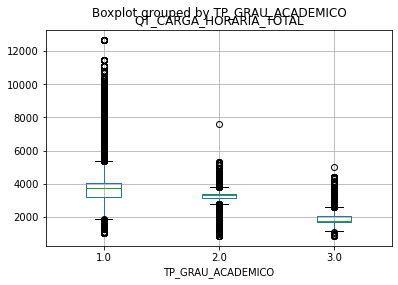

In [31]:
# TP_GRAU_ACADEMICO x QT_CARGA_HORARIA_TOTAL	-1
df_abt_aluno.boxplot(['QT_CARGA_HORARIA_TOTAL'], 'TP_GRAU_ACADEMICO')

In [32]:
# IN_INGRESSO_OUTRO x IN_INGRESSO_VESTIBULAR	-1
pd.crosstab(df_abt_aluno['IN_INGRESSO_OUTRO'], df_abt_aluno['IN_INGRESSO_VESTIBULAR'], normalize=True)

IN_INGRESSO_VESTIBULAR,0,1
IN_INGRESSO_OUTRO,,
0,0.108,0.714
1,0.162,0.016


# Consolidando a ABT e o Target

In [34]:
X = df_abt_aluno[features]
y = df_abt_aluno[target]

In [37]:
# df_abt_aluno.to_csv('df_abt_aluno.csv', index=False)

# Divisão treino e teste da ABT

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=42)

In [39]:
print("Treino", X_train.shape, y_train.shape)
print("Teste ", X_test.shape, y_test.shape)

Treino (835685, 25) (835685, 1)
Teste  (358151, 25) (358151, 1)


# Missing Values 

## Base de Treino

In [40]:
# Verificando os missings
X_train.isnull().sum()

TP_CATEGORIA_ADMINISTRATIVA            0
TP_ORGANIZACAO_ACADEMICA               0
TP_TURNO                          221522
TP_GRAU_ACADEMICO                     65
TP_COR_RACA                            0
TP_ESCOLA_CONCLUSAO_ENS_MEDIO          0
TP_SEXO                                0
QT_CARGA_HORARIA_TOTAL                 0
NU_IDADE                               0
IN_INGRESSO_VESTIBULAR                 0
IN_INGRESSO_ENEM                       0
IN_FIN_REEMB_FIES                      0
IN_FIN_REEMB_PROG_IES                  0
IN_FIN_NAOREEMB_PROUNI_INTEGR          0
IN_FIN_NAOREEMB_PROUNI_PARCIAL         0
IN_FIN_NAOREEMB_PROG_IES               0
IN_DEFICIENCIA                         0
IN_RESERVA_VAGAS                       0
IN_APOIO_SOCIAL                        0
IN_ATIVIDADE_EXTRACURRICULAR           0
IN_MOBILIDADE_ACADEMICA                0
IN_INGRESSO_OUTRO                      0
IN_FIN_REEMB_OUTRO                     0
IN_FIN_NAO_REEMB_OUTRO                 0
CO_CINE_AREA_GER

In [41]:
# Distribuição dos missings
[print(X_train[c].value_counts(normalize=True, dropna=False), "\n") for c in ['TP_TURNO', 'TP_GRAU_ACADEMICO']]
    

3.000   0.530
NaN     0.265
1.000   0.160
4.000   0.026
2.000   0.019
Name: TP_TURNO, dtype: float64 

1.000   0.697
3.000   0.170
2.000   0.134
NaN     0.000
Name: TP_GRAU_ACADEMICO, dtype: float64 



[None, None]

In [42]:
# Preenchendo os missings

# Treino
X_train[['TP_TURNO', 'TP_GRAU_ACADEMICO']] = X_train[['TP_TURNO', 'TP_GRAU_ACADEMICO']].fillna(0).copy()

# Teste
X_test[['TP_TURNO', 'TP_GRAU_ACADEMICO']]  = X_test[['TP_TURNO', 'TP_GRAU_ACADEMICO']].fillna(0).copy()

C:\Users\rafsa\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [43]:
# Distribuição após o preenchimento dos missings
[print(X_train[c].value_counts(normalize=True, dropna=False), "\n") for c in ['TP_TURNO', 'TP_GRAU_ACADEMICO']]

3.000   0.530
0.000   0.265
1.000   0.160
4.000   0.026
2.000   0.019
Name: TP_TURNO, dtype: float64 

1.000   0.697
3.000   0.170
2.000   0.134
0.000   0.000
Name: TP_GRAU_ACADEMICO, dtype: float64 



[None, None]

## One hot encoder nas variáveis

In [44]:
from feature_engine.encoding import OneHotEncoder

# Adicionando Área CINE como variável categórica
cat_vars.append('CO_CINE_AREA_GERAL')

# Instanciando o objeto OneHotEncoder
ohe = OneHotEncoder(variables=cat_vars)

# Treino
# Antes do OHE, transformam-se as variáveis em tipo Texto e depois aplica o OHE
X_train[cat_vars] = X_train[cat_vars].astype(str)
X_train_cat_ohe = ohe.fit_transform(X_train[cat_vars])

# Teste
# Antes do OHE, transformam-se as variáveis em tipo Texto e depois aplica o OHE
X_test[cat_vars] = X_test[cat_vars].astype(str)
X_test_cat_ohe  = ohe.transform(X_test[cat_vars])

In [45]:
# Novas colunas OHE
X_train_cat_ohe.columns

Index(['TP_CATEGORIA_ADMINISTRATIVA_4', 'TP_CATEGORIA_ADMINISTRATIVA_5',
       'TP_CATEGORIA_ADMINISTRATIVA_3', 'TP_CATEGORIA_ADMINISTRATIVA_7',
       'TP_ORGANIZACAO_ACADEMICA_1', 'TP_ORGANIZACAO_ACADEMICA_2',
       'TP_ORGANIZACAO_ACADEMICA_3', 'TP_TURNO_0.0', 'TP_TURNO_3.0',
       'TP_TURNO_1.0', 'TP_TURNO_2.0', 'TP_TURNO_4.0', 'TP_GRAU_ACADEMICO_3.0',
       'TP_GRAU_ACADEMICO_1.0', 'TP_GRAU_ACADEMICO_2.0',
       'TP_GRAU_ACADEMICO_0.0', 'TP_COR_RACA_0', 'TP_COR_RACA_1',
       'TP_COR_RACA_3', 'TP_COR_RACA_4', 'TP_COR_RACA_2', 'TP_COR_RACA_5',
       'TP_COR_RACA_9', 'TP_ESCOLA_CONCLUSAO_ENS_MEDIO_1',
       'TP_ESCOLA_CONCLUSAO_ENS_MEDIO_2', 'TP_ESCOLA_CONCLUSAO_ENS_MEDIO_9',
       'CO_CINE_AREA_GERAL_4', 'CO_CINE_AREA_GERAL_3', 'CO_CINE_AREA_GERAL_1',
       'CO_CINE_AREA_GERAL_9', 'CO_CINE_AREA_GERAL_8', 'CO_CINE_AREA_GERAL_6',
       'CO_CINE_AREA_GERAL_7', 'CO_CINE_AREA_GERAL_2', 'CO_CINE_AREA_GERAL_10',
       'CO_CINE_AREA_GERAL_5', 'CO_CINE_AREA_GERAL_0'],
      dtyp

## Reconstruindo as bases de treino e teste

In [46]:
# Base apenas com as variáveis numéricas

# Treino
X_train_num = X_train.drop(columns=cat_vars)
X_train_lr = pd.concat([X_train_num, X_train_cat_ohe], axis='columns')

# Teste
X_test_num = X_test.drop(columns=cat_vars)
X_test_lr  = pd.concat([X_test_num, X_test_cat_ohe], axis='columns')

# VIF

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_train_lr_VIF = add_constant(X_train_lr)

vif_res = pd.Series([variance_inflation_factor(X_train_lr_VIF.values, i) 
                for i in range(X_train_lr_VIF.shape[1])], 
                index=X_train_lr_VIF.columns)

C:\Users\rafsa\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\rafsa\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [48]:
# pd.DataFrame(vif_res).to_csv("vif_results.csv")

## Convertendo para os tipos mais adequados

In [49]:
# Convertendo para os melhores tipos
X_train_lrn = X_train_lr.convert_dtypes()

In [50]:
# Convertendo para os melhores tipos
X_test_lrn = X_test_lr.convert_dtypes()

# Criando a função para obter as métricas

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score, confusion_matrix

def get_custom_metrics(y_train, y_train_pred, y_test, y_test_pred):

    pd.options.display.float_format = "{:.5f}".format

    # treino: especificidade
    tn_x, fp_x, fn_x, tp_x = confusion_matrix(y_train, y_train_pred).ravel()
    specificity_x = tn_x / (tn_x+fp_x)

    # treino: acurácia, precisão, recall, f1 e auc
    acc_train         = accuracy_score(y_train, y_train_pred)
    prec_train        = precision_score(y_train, y_train_pred)
    recall_train      = recall_score(y_train, y_train_pred)
    specificity_train = specificity_x
    f1_train          = f1_score(y_train, y_train_pred)
    roc_auc_train     = roc_auc_score(y_train, y_train_pred)
    r2_train          = r2_score(y_train, y_train_pred) 

    # teste: especificidade
    tn_y, fp_y, fn_y, tp_y = confusion_matrix(y_test, y_test_pred).ravel()
    specificity_y = tn_y / (tn_y+fp_y)

    # teste: acurácia, precisão, recall, f1 e auc
    acc_test         = accuracy_score(y_test, y_test_pred)
    prec_test        = precision_score(y_test, y_test_pred)
    recall_test      = recall_score(y_test, y_test_pred)
    specificity_test = specificity_y
    f1_test          = f1_score(y_test, y_test_pred)
    roc_auc_test     = roc_auc_score(y_test, y_test_pred)
    r2_test          = r2_score(y_test, y_test_pred)

    # dicionários das métricas
    train_metrics = {
        'Acurácia': acc_train, 
        'Sensibilidade/Recall': recall_train,
        'Especificidade': specificity_train, 
        'ROC-AUC': roc_auc_train,
        'Precisão': prec_train, 
        'F1': f1_train, 
        'R2': r2_train}

    test_metrics = {
        'Acurácia': acc_test, 
        'Sensibilidade/Recall': recall_test,
        'Especificidade': specificity_test,
        'ROC-AUC': roc_auc_test,
        'Precisão': prec_test,
        'F1': f1_test, 
        'R2': r2_test}

    # obtendo os resultados
    results_train = pd.DataFrame.from_dict(train_metrics, orient='index', columns=['Treino'])
    results_test  = pd.DataFrame.from_dict(test_metrics, orient='index', columns=['Teste'])

    # unindo e apresentando os resultados
    return results_train.merge(results_test, how='outer', left_index=True, right_index=True)
    

In [52]:
X_train_lrn.columns

Index(['TP_SEXO', 'QT_CARGA_HORARIA_TOTAL', 'NU_IDADE',
       'IN_INGRESSO_VESTIBULAR', 'IN_INGRESSO_ENEM', 'IN_FIN_REEMB_FIES',
       'IN_FIN_REEMB_PROG_IES', 'IN_FIN_NAOREEMB_PROUNI_INTEGR',
       'IN_FIN_NAOREEMB_PROUNI_PARCIAL', 'IN_FIN_NAOREEMB_PROG_IES',
       'IN_DEFICIENCIA', 'IN_RESERVA_VAGAS', 'IN_APOIO_SOCIAL',
       'IN_ATIVIDADE_EXTRACURRICULAR', 'IN_MOBILIDADE_ACADEMICA',
       'IN_INGRESSO_OUTRO', 'IN_FIN_REEMB_OUTRO', 'IN_FIN_NAO_REEMB_OUTRO',
       'TP_CATEGORIA_ADMINISTRATIVA_4', 'TP_CATEGORIA_ADMINISTRATIVA_5',
       'TP_CATEGORIA_ADMINISTRATIVA_3', 'TP_CATEGORIA_ADMINISTRATIVA_7',
       'TP_ORGANIZACAO_ACADEMICA_1', 'TP_ORGANIZACAO_ACADEMICA_2',
       'TP_ORGANIZACAO_ACADEMICA_3', 'TP_TURNO_0.0', 'TP_TURNO_3.0',
       'TP_TURNO_1.0', 'TP_TURNO_2.0', 'TP_TURNO_4.0', 'TP_GRAU_ACADEMICO_3.0',
       'TP_GRAU_ACADEMICO_1.0', 'TP_GRAU_ACADEMICO_2.0',
       'TP_GRAU_ACADEMICO_0.0', 'TP_COR_RACA_0', 'TP_COR_RACA_1',
       'TP_COR_RACA_3', 'TP_COR_RACA_4', 'TP_

# Árvore de Decisão

## Avaliando o modelo

In [53]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Instanciando a árvore de decisão
tree_model = DecisionTreeClassifier(random_state=42)

# Ajustando à base de treino
tree_model.fit(X_train_lrn, y_train)

# Treino
y_pred_train_tree = tree_model.predict(X_train_lrn)

# Teste
y_pred_test_tree = tree_model.predict(X_test_lrn)

## Métricas de Avaliação

In [54]:
get_custom_metrics(y_train, y_pred_train_tree, y_test, y_pred_test_tree)

,Treino,Teste
Acurácia,0.95006,0.77162
Sensibilidade/Recall,0.90252,0.67369
Especificidade,0.97921,0.83168
ROC-AUC,0.94087,0.75268
Precisão,0.96380,0.71050
F1,0.93215,0.69160
R2,0.78806,0.03077


## Matriz de Confusão

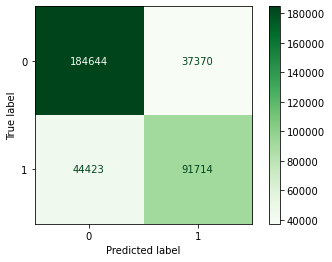

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matriz_tree = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test_tree))

matriz_tree.plot(cmap='Greens')

## Plotando a árvore de decisão

[Text(1116.0, 1426.95, 'IN_FIN_REEMB_FIES <= 0.5\ngini = 0.471\nsamples = 835685\nvalue = [518031, 317654]'),
 Text(558.0, 1019.25, 'IN_ATIVIDADE_EXTRACURRICULAR <= 0.5\ngini = 0.411\nsamples = 624336\nvalue = [444092, 180244]'),
 Text(279.0, 611.55, 'IN_FIN_NAOREEMB_PROUNI_INTEGR <= 0.5\ngini = 0.377\nsamples = 561892\nvalue = [420371, 141521]'),
 Text(139.5, 203.8499999999999, '\n  (...)  \n'),
 Text(418.5, 203.8499999999999, '\n  (...)  \n'),
 Text(837.0, 611.55, 'NU_IDADE <= 20.5\ngini = 0.471\nsamples = 62444\nvalue = [23721, 38723]'),
 Text(697.5, 203.8499999999999, '\n  (...)  \n'),
 Text(976.5, 203.8499999999999, '\n  (...)  \n'),
 Text(1674.0, 1019.25, 'NU_IDADE <= 20.5\ngini = 0.455\nsamples = 211349\nvalue = [73939, 137410]'),
 Text(1395.0, 611.55, 'TP_GRAU_ACADEMICO_1.0 <= 0.5\ngini = 0.216\nsamples = 7558\nvalue = [6629, 929]'),
 Text(1255.5, 203.8499999999999, '\n  (...)  \n'),
 Text(1534.5, 203.8499999999999, '\n  (...)  \n'),
 Text(1953.0, 611.55, 'IN_ATIVIDADE_EXTRACUR

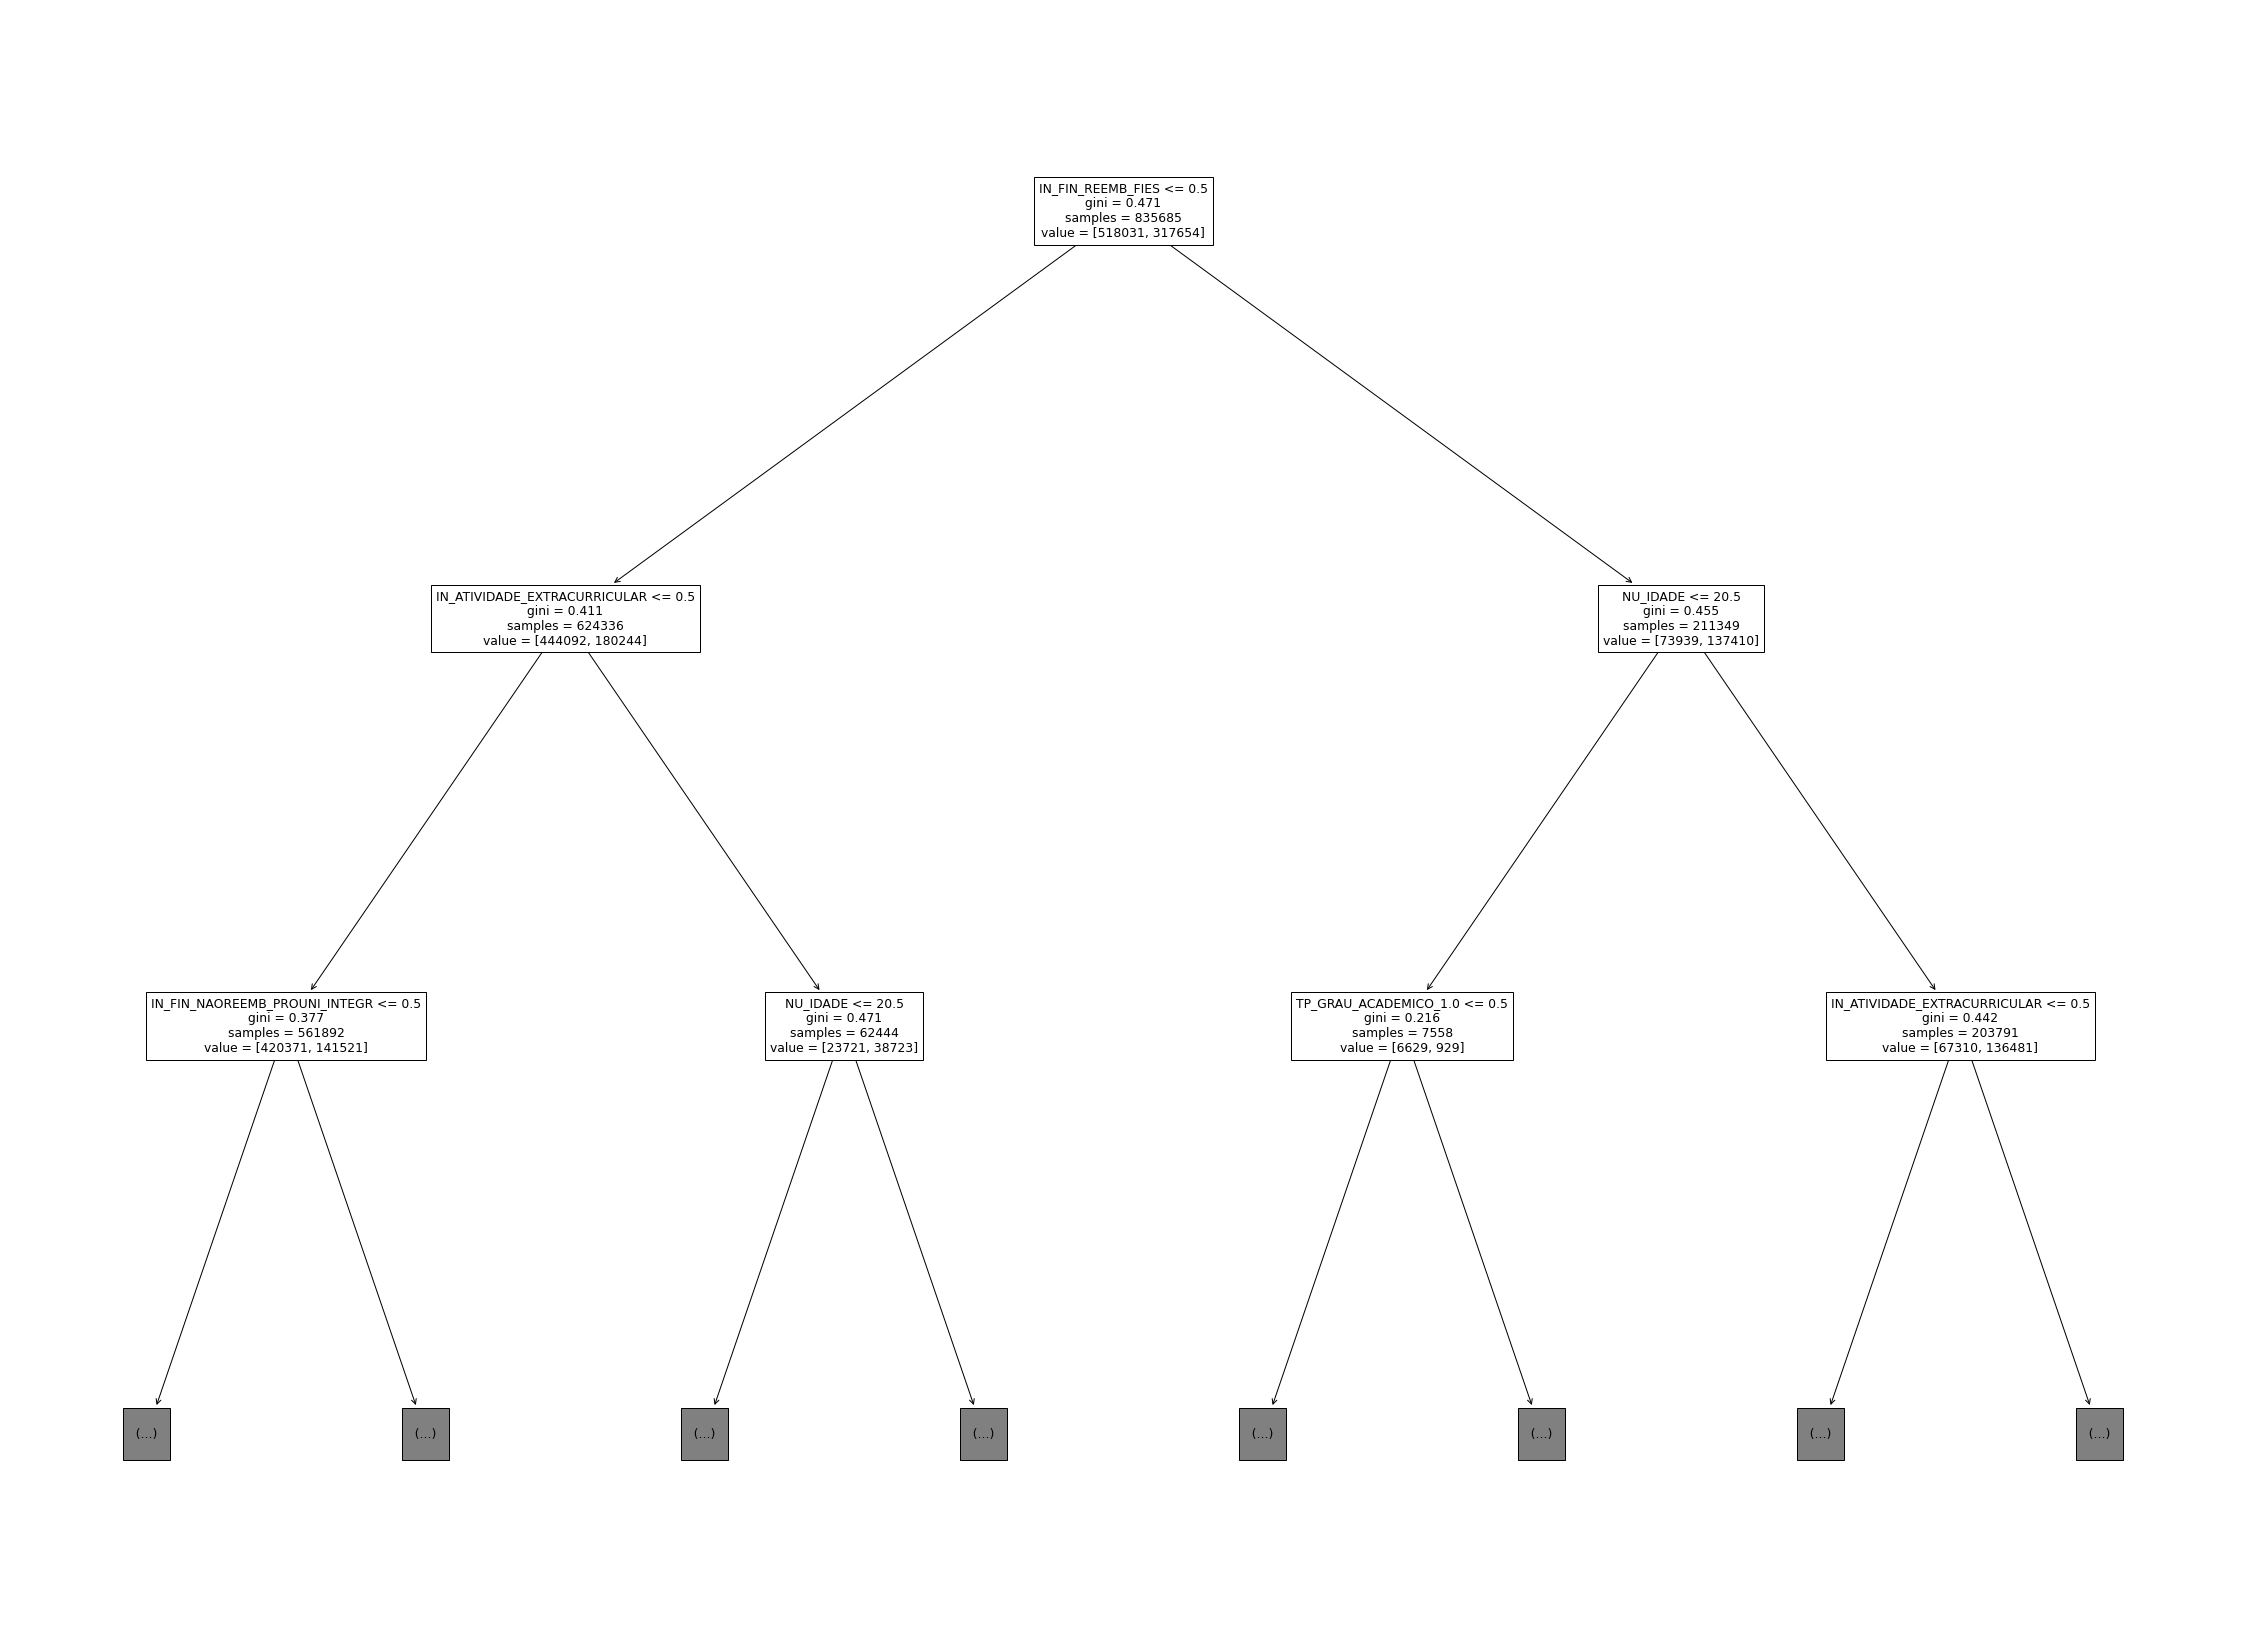

In [56]:
fig = plt.figure(figsize=(40,30))
plot_tree(tree_model, max_depth=2, feature_names=X_train_lr.columns)

# Regressão Logística

## Padronizando as variáveis para a regressão logística

In [57]:
from sklearn.preprocessing import StandardScaler

num_cols = X_train_num.columns

scaler = StandardScaler()
scaler.fit(X_train_lrn[num_cols])

sc_trans = scaler.transform(X_train_lrn[num_cols])

# Treino
X_train_num_scaled = pd.DataFrame(sc_trans, columns=num_cols)
X_train_num_scaled.describe()

,TP_SEXO,QT_CARGA_HORARIA_TOTAL,NU_IDADE,IN_INGRESSO_VESTIBULAR,IN_INGRESSO_ENEM,IN_FIN_REEMB_FIES,IN_FIN_REEMB_PROG_IES,IN_FIN_NAOREEMB_PROUNI_INTEGR,IN_FIN_NAOREEMB_PROUNI_PARCIAL,IN_FIN_NAOREEMB_PROG_IES,IN_DEFICIENCIA,IN_RESERVA_VAGAS,IN_APOIO_SOCIAL,IN_ATIVIDADE_EXTRACURRICULAR,IN_MOBILIDADE_ACADEMICA,IN_INGRESSO_OUTRO,IN_FIN_REEMB_OUTRO,IN_FIN_NAO_REEMB_OUTRO
count,835685.00000,835685.00000,835685.00000,835685.00000,835685.00000,835685.00000,835685.00000,835685.00000,835685.00000,835685.00000,835685.00000,835685.00000,835685.00000,835685.00000,835685.00000,835685.00000,835685.00000,835685.00000
mean,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
min,-0.87543,-2.68397,-1.62510,-1.64535,-0.40875,-0.58182,-0.23266,-0.32698,-0.19646,-1.27150,-0.19664,-0.01969,-0.33780,-0.36780,-0.01634,-0.46513,-0.10970,-0.21577
25%,-0.87543,-0.40276,-0.79219,-1.64535,-0.40875,-0.58182,-0.23266,-0.32698,-0.19646,-1.27150,-0.19664,-0.01969,-0.33780,-0.36780,-0.01634,-0.46513,-0.10970,-0.21577
50%,-0.87543,0.04503,-0.31625,0.60777,-0.40875,-0.58182,-0.23266,-0.32698,-0.19646,0.78648,-0.19664,-0.01969,-0.33780,-0.36780,-0.01634,-0.46513,-0.10970,-0.21577
75%,1.14229,0.63223,0.51665,0.60777,-0.40875,1.71874,-0.23266,-0.32698,-0.19646,0.78648,-0.19664,-0.01969,-0.33780,-0.36780,-0.01634,-0.46513,-0.10970,-0.21577
max,1.14229,9.83098,7.77481,0.60777,2.44650,1.71874,4.29818,3.05831,5.09017,0.78648,5.13756,50.77671,2.96030,2.71884,61.20838,2.14991,9.11583,4.63450


In [58]:
num_cols_test = X_test_num.columns

sc_trans_test = scaler.transform(X_test_lrn[num_cols_test])

# Teste
X_test_num_scaled = pd.DataFrame(sc_trans_test, columns=num_cols_test)
X_test_num_scaled.describe()

,TP_SEXO,QT_CARGA_HORARIA_TOTAL,NU_IDADE,IN_INGRESSO_VESTIBULAR,IN_INGRESSO_ENEM,IN_FIN_REEMB_FIES,IN_FIN_REEMB_PROG_IES,IN_FIN_NAOREEMB_PROUNI_INTEGR,IN_FIN_NAOREEMB_PROUNI_PARCIAL,IN_FIN_NAOREEMB_PROG_IES,IN_DEFICIENCIA,IN_RESERVA_VAGAS,IN_APOIO_SOCIAL,IN_ATIVIDADE_EXTRACURRICULAR,IN_MOBILIDADE_ACADEMICA,IN_INGRESSO_OUTRO,IN_FIN_REEMB_OUTRO,IN_FIN_NAO_REEMB_OUTRO
count,358151.00000,358151.00000,358151.00000,358151.00000,358151.00000,358151.00000,358151.00000,358151.00000,358151.00000,358151.00000,358151.00000,358151.00000,358151.00000,358151.00000,358151.00000,358151.00000,358151.00000,358151.00000
mean,-0.00318,0.00183,-0.00021,-0.00198,0.00349,0.00053,-0.00273,0.00271,0.00153,-0.00146,-0.00070,-0.00012,-0.00154,-0.00136,0.00024,0.00052,0.00222,0.00202
std,0.99957,1.00071,0.99987,1.00103,1.00355,1.00030,0.99443,1.00370,1.00374,1.00036,0.99835,0.99691,0.99798,0.99840,1.00745,1.00044,1.00996,1.00445
min,-0.87543,-2.68397,-1.62510,-1.64535,-0.40875,-0.58182,-0.23266,-0.32698,-0.19646,-1.27150,-0.19664,-0.01969,-0.33780,-0.36780,-0.01634,-0.46513,-0.10970,-0.21577
25%,-0.87543,-0.40276,-0.79219,-1.64535,-0.40875,-0.58182,-0.23266,-0.32698,-0.19646,-1.27150,-0.19664,-0.01969,-0.33780,-0.36780,-0.01634,-0.46513,-0.10970,-0.21577
50%,-0.87543,0.04081,-0.31625,0.60777,-0.40875,-0.58182,-0.23266,-0.32698,-0.19646,0.78648,-0.19664,-0.01969,-0.33780,-0.36780,-0.01634,-0.46513,-0.10970,-0.21577
75%,1.14229,0.63223,0.51665,0.60777,-0.40875,1.71874,-0.23266,-0.32698,-0.19646,0.78648,-0.19664,-0.01969,-0.33780,-0.36780,-0.01634,-0.46513,-0.10970,-0.21577
max,1.14229,9.83098,6.94190,0.60777,2.44650,1.71874,4.29818,3.05831,5.09017,0.78648,5.13756,50.77671,2.96030,2.71884,61.20838,2.14991,9.11583,4.63450


## Realinhando os índices das tabelas

In [59]:
# realinhando os índices das tabelas
X_train_num_scaled = X_train_num_scaled.set_index(X_train_lrn.index)
X_test_num_scaled  = X_test_num_scaled.set_index(X_test_lrn.index)

X_train_cat_ohe = X_train_cat_ohe.set_index(X_train_lrn.index)
X_test_cat_ohe = X_test_cat_ohe.set_index(X_test_lrn.index)

X_train_lrn_scaled = pd.concat([X_train_num_scaled, X_train_cat_ohe], axis='columns')
X_test_lrn_scaled = pd.concat([X_test_num_scaled, X_test_cat_ohe], axis='columns')

X_train_lrn_scaled.head()

,TP_SEXO,QT_CARGA_HORARIA_TOTAL,NU_IDADE,IN_INGRESSO_VESTIBULAR,IN_INGRESSO_ENEM,IN_FIN_REEMB_FIES,IN_FIN_REEMB_PROG_IES,IN_FIN_NAOREEMB_PROUNI_INTEGR,IN_FIN_NAOREEMB_PROUNI_PARCIAL,IN_FIN_NAOREEMB_PROG_IES,...,CO_CINE_AREA_GERAL_3,CO_CINE_AREA_GERAL_1,CO_CINE_AREA_GERAL_9,CO_CINE_AREA_GERAL_8,CO_CINE_AREA_GERAL_6,CO_CINE_AREA_GERAL_7,CO_CINE_AREA_GERAL_2,CO_CINE_AREA_GERAL_10,CO_CINE_AREA_GERAL_5,CO_CINE_AREA_GERAL_0
545771,-0.87543,-1.45888,0.27868,0.60777,-0.40875,-0.58182,-0.23266,-0.32698,-0.19646,0.78648,...,0,0,0,0,0,0,0,0,0,0
920345,-0.87543,0.65335,-1.03017,-1.64535,2.44650,-0.58182,-0.23266,3.05831,-0.19646,-1.27150,...,1,0,0,0,0,0,0,0,0,0
1151226,-0.87543,-0.99418,-0.07828,0.60777,-0.40875,-0.58182,-0.23266,-0.32698,-0.19646,0.78648,...,0,0,0,0,0,0,0,0,0,0
699528,-0.87543,0.37031,-0.67321,0.60777,-0.40875,-0.58182,-0.23266,-0.32698,-0.19646,0.78648,...,0,0,0,0,0,0,0,0,0,0
798437,1.14229,-0.61398,3.01536,0.60777,-0.40875,-0.58182,-0.23266,-0.32698,-0.19646,0.78648,...,0,1,0,0,0,0,0,0,0,0


In [60]:
X_test_lrn_scaled.head()

,TP_SEXO,QT_CARGA_HORARIA_TOTAL,NU_IDADE,IN_INGRESSO_VESTIBULAR,IN_INGRESSO_ENEM,IN_FIN_REEMB_FIES,IN_FIN_REEMB_PROG_IES,IN_FIN_NAOREEMB_PROUNI_INTEGR,IN_FIN_NAOREEMB_PROUNI_PARCIAL,IN_FIN_NAOREEMB_PROG_IES,...,CO_CINE_AREA_GERAL_3,CO_CINE_AREA_GERAL_1,CO_CINE_AREA_GERAL_9,CO_CINE_AREA_GERAL_8,CO_CINE_AREA_GERAL_6,CO_CINE_AREA_GERAL_7,CO_CINE_AREA_GERAL_2,CO_CINE_AREA_GERAL_10,CO_CINE_AREA_GERAL_5,CO_CINE_AREA_GERAL_0
1094894,-0.87543,1.06946,0.75463,-1.64535,-0.40875,1.71874,-0.23266,-0.32698,-0.19646,0.78648,...,0,0,1,0,0,0,0,0,0,0
220255,1.14229,-0.40276,0.04071,0.60777,-0.40875,1.71874,-0.23266,-0.32698,-0.19646,0.78648,...,0,0,0,0,0,0,0,0,0,0
456162,-0.87543,-1.74191,2.65840,0.60777,-0.40875,-0.58182,-0.23266,-0.32698,-0.19646,0.78648,...,0,0,0,0,0,0,0,0,0,0
611604,-0.87543,-1.65848,-0.67321,0.60777,-0.40875,-0.58182,-0.23266,-0.32698,-0.19646,0.78648,...,0,0,0,0,0,0,0,1,0,0
483884,1.14229,0.54774,-0.79219,0.60777,-0.40875,-0.58182,-0.23266,-0.32698,-0.19646,0.78648,...,0,0,0,0,0,1,0,0,0,0


In [61]:
X_train_lrn_scaled.columns

Index(['TP_SEXO', 'QT_CARGA_HORARIA_TOTAL', 'NU_IDADE',
       'IN_INGRESSO_VESTIBULAR', 'IN_INGRESSO_ENEM', 'IN_FIN_REEMB_FIES',
       'IN_FIN_REEMB_PROG_IES', 'IN_FIN_NAOREEMB_PROUNI_INTEGR',
       'IN_FIN_NAOREEMB_PROUNI_PARCIAL', 'IN_FIN_NAOREEMB_PROG_IES',
       'IN_DEFICIENCIA', 'IN_RESERVA_VAGAS', 'IN_APOIO_SOCIAL',
       'IN_ATIVIDADE_EXTRACURRICULAR', 'IN_MOBILIDADE_ACADEMICA',
       'IN_INGRESSO_OUTRO', 'IN_FIN_REEMB_OUTRO', 'IN_FIN_NAO_REEMB_OUTRO',
       'TP_CATEGORIA_ADMINISTRATIVA_4', 'TP_CATEGORIA_ADMINISTRATIVA_5',
       'TP_CATEGORIA_ADMINISTRATIVA_3', 'TP_CATEGORIA_ADMINISTRATIVA_7',
       'TP_ORGANIZACAO_ACADEMICA_1', 'TP_ORGANIZACAO_ACADEMICA_2',
       'TP_ORGANIZACAO_ACADEMICA_3', 'TP_TURNO_0.0', 'TP_TURNO_3.0',
       'TP_TURNO_1.0', 'TP_TURNO_2.0', 'TP_TURNO_4.0', 'TP_GRAU_ACADEMICO_3.0',
       'TP_GRAU_ACADEMICO_1.0', 'TP_GRAU_ACADEMICO_2.0',
       'TP_GRAU_ACADEMICO_0.0', 'TP_COR_RACA_0', 'TP_COR_RACA_1',
       'TP_COR_RACA_3', 'TP_COR_RACA_4', 'TP_

## Avaliando o modelo

In [62]:
from sklearn.linear_model import LogisticRegression

# instanciar um modelo de regressão logística
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# treinando o modelo na base de treino transformada
lr_model.fit(X_train_lrn_scaled, y_train.values.ravel())

y_pred_train_regr = lr_model.predict(X_train_lrn_scaled)
y_pred_test_regr  = lr_model.predict(X_test_lrn_scaled)

## Métricas de Avaliação

In [63]:
get_custom_metrics(y_train, y_pred_train_regr, y_test, y_pred_test_regr)

,Treino,Teste
Acurácia,0.72491,0.72505
Sensibilidade/Recall,0.55888,0.55982
Especificidade,0.82672,0.82637
ROC-AUC,0.69280,0.69309
Precisão,0.66418,0.66409
F1,0.60700,0.60751
R2,-0.16747,-0.16689


## Matriz de Confusão

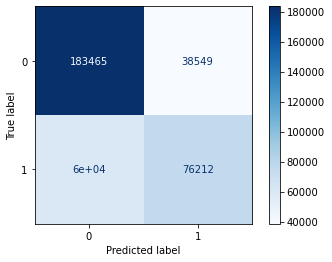

In [64]:
matriz_regr = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test_regr))

matriz_regr.plot(cmap='Blues')

# Machine Learning

In [65]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

skf4 = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

## Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

# instanciar um modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# treinando o modelo na base de treino transformada
rf_model.fit(X_train_lrn_scaled, y_train.values.ravel())

y_pred_train_rf = rf_model.predict(X_train_lrn_scaled)
y_pred_test_rf  = rf_model.predict(X_test_lrn_scaled)

In [67]:
get_custom_metrics(y_train, y_pred_train_rf, y_test, y_pred_test_rf)

,Treino,Teste
Acurácia,0.95004,0.78796
Sensibilidade/Recall,0.92412,0.71189
Especificidade,0.96594,0.83461
ROC-AUC,0.94503,0.77325
Precisão,0.94331,0.72523
F1,0.93361,0.71850
R2,0.78799,0.10012


In [68]:
cv_rf = cross_validate(rf_model, X_train_lrn_scaled, y_train.values.ravel(), cv=skf4, n_jobs=-1, return_train_score=True)
cv_results_rf = pd.DataFrame(cv_rf)
cv_results_rf

,fit_time,score_time,test_score,train_score
0,212.30542,41.21907,0.78711,0.95467
1,211.91749,41.05847,0.78597,0.95482
2,214.85260,42.73697,0.78581,0.95478
3,213.94454,42.62915,0.78758,0.95481


## Gradient Boost

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train_lrn_scaled, y_train.values.ravel())

y_pred_train_gb = gb_model.predict(X_train_lrn_scaled)
y_pred_test_gb =  gb_model.predict(X_test_lrn_scaled)

In [70]:
get_custom_metrics(y_train, y_pred_train_gb, y_test, y_pred_test_gb)

,Treino,Teste
Acurácia,0.75255,0.75220
Sensibilidade/Recall,0.63907,0.64018
Especificidade,0.82214,0.82089
ROC-AUC,0.73061,0.73054
Precisão,0.68782,0.68669
F1,0.66255,0.66262
R2,-0.05017,-0.05165


In [71]:
cv_gb = cross_validate(gb_model, X_train_lrn_scaled, y_train.values.ravel(), cv=skf4, n_jobs=-1, return_train_score=True)
cv_results_gb = pd.DataFrame(cv_gb)
cv_results_gb

,fit_time,score_time,test_score,train_score
0,276.68671,1.11367,0.75291,0.75271
1,276.70631,1.09937,0.75485,0.75498
2,278.96770,1.14349,0.75073,0.75129
3,278.68841,1.05834,0.75287,0.75327


## Extreme Gradient Boosting (XGBoost)

In [72]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(X_train_lrn_scaled, y_train.values.ravel())

y_pred_train_xgb = xgb_model.predict(X_train_lrn_scaled)
y_pred_test_xgb =  xgb_model.predict(X_test_lrn_scaled)

C:\Users\rafsa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:45:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [73]:
get_custom_metrics(y_train, y_pred_train_xgb, y_test, y_pred_test_xgb)

,Treino,Teste
Acurácia,0.79980,0.79640
Sensibilidade/Recall,0.72506,0.72257
Especificidade,0.84563,0.84168
ROC-AUC,0.78535,0.78212
Precisão,0.74228,0.73675
F1,0.73357,0.72959
R2,0.15037,0.13594


In [74]:
cv_xgb = cross_validate(xgb_model, X_train_lrn_scaled, y_train.values.ravel(), cv=skf4, n_jobs=-1, return_train_score=True)
cv_results_xgb = pd.DataFrame(cv_xgb)
cv_results_xgb

,fit_time,score_time,test_score,train_score
0,202.54690,0.82790,0.79689,0.79837
1,205.48431,0.47141,0.79633,0.80083
2,205.43230,0.50643,0.79530,0.80161
3,202.50829,0.55228,0.79481,0.79922


## Light Gradient Boosting (LGBM)

In [75]:
#!pip install lightgbm

In [76]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(random_state=42)

lgb_model.fit(X_train_lrn_scaled, y_train.values.ravel())

y_pred_train_lgb = lgb_model.predict(X_train_lrn_scaled)
y_pred_test_lgb =  lgb_model.predict(X_test_lrn_scaled)

In [77]:
get_custom_metrics(y_train, y_pred_train_lgb, y_test, y_pred_test_lgb)

,Treino,Teste
Acurácia,0.77998,0.77870
Sensibilidade/Recall,0.69512,0.69509
Especificidade,0.83201,0.82997
ROC-AUC,0.76357,0.76253
Precisão,0.71730,0.71484
F1,0.70604,0.70483
R2,0.06622,0.06081


In [78]:
cv_lgb = cross_validate(lgb_model, X_train_lrn_scaled, y_train.values.ravel(), cv=skf4, n_jobs=-1, return_train_score=True)
cv_results_lgb = pd.DataFrame(cv_lgb)
cv_results_lgb

,fit_time,score_time,test_score,train_score
0,15.91258,3.47974,0.77917,0.77917
1,14.67356,2.96447,0.77817,0.77977
2,14.31464,2.89495,0.77783,0.77979
3,14.96471,3.05150,0.77997,0.77993


## Catboost

In [79]:
# !pip install catboost

In [80]:
from catboost import CatBoostClassifier

cb_model = CatBoostClassifier(random_state=42)

cb_model.fit(X_train_lrn_scaled, y_train.values.ravel())

y_pred_train_cb = cb_model.predict(X_train_lrn_scaled)
y_pred_test_cb  =  cb_model.predict(X_test_lrn_scaled)

Learning rate set to 0.182241
0:	learn: 0.6281821	total: 260ms	remaining: 4m 20s
1:	learn: 0.5944723	total: 345ms	remaining: 2m 52s
2:	learn: 0.5673896	total: 436ms	remaining: 2m 24s
3:	learn: 0.5532463	total: 542ms	remaining: 2m 14s
4:	learn: 0.5432254	total: 630ms	remaining: 2m 5s
5:	learn: 0.5357315	total: 716ms	remaining: 1m 58s
6:	learn: 0.5292970	total: 818ms	remaining: 1m 56s
7:	learn: 0.5256153	total: 920ms	remaining: 1m 54s
8:	learn: 0.5224831	total: 1.03s	remaining: 1m 53s
9:	learn: 0.5172323	total: 1.12s	remaining: 1m 51s
10:	learn: 0.5136430	total: 1.23s	remaining: 1m 50s
11:	learn: 0.5119162	total: 1.34s	remaining: 1m 50s
12:	learn: 0.5092331	total: 1.43s	remaining: 1m 48s
13:	learn: 0.5069823	total: 1.54s	remaining: 1m 48s
14:	learn: 0.5060265	total: 1.62s	remaining: 1m 46s
15:	learn: 0.5036130	total: 1.73s	remaining: 1m 46s
16:	learn: 0.5014720	total: 1.82s	remaining: 1m 45s
17:	learn: 0.5002198	total: 1.94s	remaining: 1m 45s
18:	learn: 0.4989829	total: 2.05s	remaining: 

In [81]:
get_custom_metrics(y_train, y_pred_train_cb, y_test, y_pred_test_cb)

,Treino,Teste
Acurácia,0.81079,0.80510
Sensibilidade/Recall,0.74162,0.73624
Especificidade,0.85322,0.84732
ROC-AUC,0.79742,0.79178
Precisão,0.75598,0.74727
F1,0.74873,0.74172
R2,0.19701,0.17283


In [82]:
cv_cb = cross_validate(cb_model, X_train_lrn_scaled, y_train.values.ravel(), cv=skf4, n_jobs=-1, return_train_score=True)
cv_results_cb = pd.DataFrame(cv_cb)
cv_results_cb

,fit_time,score_time,test_score,train_score
0,233.57466,0.30614,0.80504,0.80969
1,234.66021,0.18981,0.80286,0.81070
2,230.91847,0.25895,0.80103,0.80994
3,232.90996,0.28391,0.80379,0.80986


# Cross-validation

In [83]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

cv_results = cross_validate(cb_model, X_train_lrn_scaled, y_train.values.ravel(), cv=skf, n_jobs=-1)
cv_results_df = pd.DataFrame(cv_results)
cv_results_df

,fit_time,score_time,test_score
0,198.85080,0.41448,0.80405
1,199.01401,0.34480,0.80228
2,199.55635,0.33611,0.80287


# Grid Search

Avaliando os resultados, vamos ficar com o Catboost

In [84]:
from sklearn.model_selection import GridSearchCV

grid = {'learning_rate': [0.03, 0.1],
        'depth': [3, 5],
        'l2_leaf_reg': [3, 6]}

grid_search = GridSearchCV(estimator=cb_model, param_grid=grid, cv=skf4, n_jobs=-1, refit=True, verbose=1)

In [85]:
grid_search.fit(X_train_lrn_scaled, y_train.values.ravel())

Fitting 4 folds for each of 8 candidates, totalling 32 fits
0:	learn: 0.6597765	total: 107ms	remaining: 1m 46s
1:	learn: 0.6338500	total: 187ms	remaining: 1m 33s
2:	learn: 0.6139821	total: 277ms	remaining: 1m 32s
3:	learn: 0.5977346	total: 371ms	remaining: 1m 32s
4:	learn: 0.5828371	total: 476ms	remaining: 1m 34s
5:	learn: 0.5731213	total: 572ms	remaining: 1m 34s
6:	learn: 0.5648646	total: 675ms	remaining: 1m 35s
7:	learn: 0.5590145	total: 771ms	remaining: 1m 35s
8:	learn: 0.5530769	total: 857ms	remaining: 1m 34s
9:	learn: 0.5485806	total: 969ms	remaining: 1m 35s
10:	learn: 0.5446814	total: 1.06s	remaining: 1m 35s
11:	learn: 0.5415098	total: 1.15s	remaining: 1m 34s
12:	learn: 0.5387466	total: 1.25s	remaining: 1m 34s
13:	learn: 0.5366317	total: 1.36s	remaining: 1m 35s
14:	learn: 0.5333461	total: 1.47s	remaining: 1m 36s
15:	learn: 0.5310182	total: 1.57s	remaining: 1m 36s
16:	learn: 0.5286952	total: 1.67s	remaining: 1m 36s
17:	learn: 0.5268307	total: 1.76s	remaining: 1m 36s
18:	learn: 0.5

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x000002E93A961AF0>,
             n_jobs=-1,
             param_grid={'depth': [3, 5], 'l2_leaf_reg': [3, 6],
                         'learning_rate': [0.03, 0.1]},
             verbose=1)

In [86]:
grid_search.best_params_

{'depth': 5, 'l2_leaf_reg': 6, 'learning_rate': 0.1}

In [87]:
grid_search.best_score_

0.7932558301896382

In [88]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_depth,param_l2_leaf_reg,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,325.90715,26.93121,0.40357,0.02152,3,3,0.03000,"{'depth': 3, 'l2_leaf_reg': 3, 'learning_rate'...",0.76352,0.76324,0.76261,0.76275,0.76303,0.00037,8
1,347.29109,1.09337,0.41703,0.03250,3,3,0.10000,"{'depth': 3, 'l2_leaf_reg': 3, 'learning_rate'...",0.77733,0.77611,0.77619,0.77663,0.77657,0.00049,6
2,384.26208,34.44928,0.53729,0.09787,3,6,0.03000,"{'depth': 3, 'l2_leaf_reg': 6, 'learning_rate'...",0.76394,0.76336,0.76261,0.76262,0.76313,0.00055,7
3,401.50986,10.98312,0.56045,0.02631,3,6,0.10000,"{'depth': 3, 'l2_leaf_reg': 6, 'learning_rate'...",0.77772,0.77665,0.77613,0.77648,0.77674,0.00059,5
4,445.15165,16.20197,0.55979,0.08927,5,3,0.03000,"{'depth': 5, 'l2_leaf_reg': 3, 'learning_rate'...",0.77904,0.77716,0.77576,0.77755,0.77738,0.00117,3
5,458.91284,18.10739,0.53005,0.04229,5,3,0.10000,"{'depth': 5, 'l2_leaf_reg': 3, 'learning_rate'...",0.79464,0.79174,0.79119,0.79385,0.79285,0.00143,2
6,438.36869,24.80223,0.42052,0.04077,5,6,0.03000,"{'depth': 5, 'l2_leaf_reg': 6, 'learning_rate'...",0.77759,0.77737,0.77637,0.77743,0.77719,0.00048,4
7,426.86206,12.06089,0.24411,0.04412,5,6,0.10000,"{'depth': 5, 'l2_leaf_reg': 6, 'learning_rate'...",0.79480,0.79232,0.79200,0.79390,0.79326,0.00115,1


In [89]:
grid_search.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x000002E93A961AF0>,
             n_jobs=-1,
             param_grid={'depth': [3, 5], 'l2_leaf_reg': [3, 6],
                         'learning_rate': [0.03, 0.1]},
             verbose=1)>

In [90]:
grid_search.score

<bound method BaseSearchCV.score of GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x000002E93A961AF0>,
             n_jobs=-1,
             param_grid={'depth': [3, 5], 'l2_leaf_reg': [3, 6],
                         'learning_rate': [0.03, 0.1]},
             verbose=1)>

In [91]:
gs_best = grid_search.best_estimator_

# Aplicando na base real

In [92]:
# diretório das bases
PATH_19 = r'C:\Users\rafsa\OneDrive\Documentos\01 Microcenso Educação Superior\Bases\Microdados_Educacao_Superior_2019\dados'

# Leitura da base ALUNO 2019
file = '\SUP_ALUNO_2019.CSV'
df_aluno_19 = pd.DataFrame()

In [93]:
start = time.time()

for chunk in pd.read_csv(PATH_19+file, sep='|', dtype={10: str, 11: str}, chunksize=250000):
    df_aluno_19 = pd.concat([df_aluno_19, chunk.query('IN_FINANCIAMENTO_ESTUDANTIL == 1 & TP_SITUACAO != 2')])
    
end = time.time()  
print("Concatenando os pedaços no DataFrame: ",(end-start),"seg")

Concatenando os pedaços no DataFrame:  93.23448896408081 seg


In [94]:
df_aluno_19.shape

(1299883, 105)

In [95]:
# Leitura da base CINE
file = '\TB_AUX_CINE_BRASIL_2019.CSV'

df_cine_19 = pd.read_csv(PATH_19+file, sep='|', encoding='ansi')

# df_cine = pd.read_csv("df_cine.csv")

In [96]:
df_cine_19[['CO_CINE_AREA_GERAL', 'NO_CINE_AREA_GERAL']].value_counts()

CO_CINE_AREA_GERAL  NO_CINE_AREA_GERAL                                        
7                   Engenharia, produção e construção                             97
1                   Educação                                                      57
2                   Artes e humanidades                                           53
4                   Negócios, administração e direito                             30
9                   Saúde e bem-estar                                             24
5                   Ciências naturais, matemática e estatística                   22
8                   Agricultura, silvicultura, pesca e veterinária                21
10                  Serviços                                                      20
3                   Ciências sociais, comunicação e informação                    17
6                   Computação e Tecnologias da Informação e Comunicação (TIC)    13
0                   Programas básicos                                  

In [97]:
key_vars_19 = ['CO_ALUNO_CURSO']

drop_vars_19 = [
    'CO_IES', 'CO_CURSO', 'CO_CURSO_POLO', 'TP_NIVEL_ACADEMICO', 'ID_ALUNO',  
    'NU_ANO_NASCIMENTO', 'NU_MES_NASCIMENTO', 'NU_DIA_NASCIMENTO', 'CO_PAIS_ORIGEM', 'CO_UF_NASCIMENTO', 
    'CO_MUNICIPIO_NASCIMENTO', 'TP_SITUACAO', 'DT_INGRESSO_CURSO', 'TP_SEMESTRE_CONCLUSAO', 'TP_SEMESTRE_REFERENCIA', 
    'CO_IES_DESTINO', 'CO_PAIS_DESTINO', 'IN_ALUNO_PARFOR', 'TP_NACIONALIDADE', 'IN_BOLSA_ESTAGIO', 
    'IN_BOLSA_EXTENSAO', 'IN_BOLSA_MONITORIA', 'IN_BOLSA_PESQUISA', 'IN_APOIO_ALIMENTACAO', 'IN_APOIO_BOLSA_PERMANENCIA', 
    'IN_APOIO_BOLSA_TRABALHO', 'IN_APOIO_MATERIAL_DIDATICO', 'IN_APOIO_MORADIA', 'IN_APOIO_TRANSPORTE',
    'IN_COMPLEMENTAR_ESTAGIO', 'IN_COMPLEMENTAR_EXTENSAO', 'IN_COMPLEMENTAR_MONITORIA', 'IN_COMPLEMENTAR_PESQUISA',
    'IN_RESERVA_ETNICO', 'IN_RESERVA_DEFICIENCIA', 'IN_RESERVA_ENSINO_PUBLICO',
    'IN_RESERVA_RENDA_FAMILIAR', 'IN_RESERVA_OUTRA', 'IN_INGRESSO_TOTAL', 
    'IN_INGRESSO_PROCESSO_SELETIVO', 'IN_INGRESSO_VAGA_NOVA', 'IN_DEFICIENCIA_AUDITIVA', 
    'IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_INTELECTUAL', 'IN_DEFICIENCIA_MULTIPLA', 
    'IN_DEFICIENCIA_SURDEZ', 'IN_DEFICIENCIA_SURDOCEGUEIRA', 'IN_DEFICIENCIA_BAIXA_VISAO',
    'IN_DEFICIENCIA_CEGUEIRA', 'IN_DEFICIENCIA_SUPERDOTACAO', 'IN_TGD_AUTISMO', 'IN_TGD_SINDROME_ASPERGER',
    'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO', 'TP_MOBILIDADE_ACADEMICA', 'TP_MOBILIDADE_ACADEMICA_INTERN',
    'IN_FINANCIAMENTO_ESTUDANTIL', 'QT_CARGA_HORARIA_INTEG', 'IN_MATRICULA', 'TP_MODALIDADE_ENSINO']

to_be_grouped_vars_19 = ['CO_CINE_ROTULO']

cat_vars_19 = [
    'TP_CATEGORIA_ADMINISTRATIVA', 'TP_ORGANIZACAO_ACADEMICA', 'TP_TURNO', 'TP_GRAU_ACADEMICO', 
    'TP_COR_RACA',  'TP_ESCOLA_CONCLUSAO_ENS_MEDIO']

cat_vars_bool_19 = ['TP_SEXO']

num_vars_19 = ['QT_CARGA_HORARIA_TOTAL', 'NU_IDADE']

ingresso_vars_19 = ['IN_INGRESSO_VESTIBULAR', 'IN_INGRESSO_ENEM'] 

ingresso_outros_vars_19 = [    
    'IN_INGRESSO_AVALIACAO_SERIADA', 'IN_INGRESSO_SELECAO_SIMPLIFICA',
    'IN_INGRESSO_OUTRO_TIPO_SELECAO', 'IN_INGRESSO_VAGA_REMANESC', 'IN_INGRESSO_VAGA_PROG_ESPECIAL',
    'IN_INGRESSO_TRANSF_EXOFFICIO', 'IN_INGRESSO_DECISAO_JUDICIAL', 'IN_INGRESSO_CONVENIO_PECG',
    'IN_INGRESSO_EGRESSO', 'IN_INGRESSO_OUTRA_FORMA']

financ_vars_19 = [
    'IN_FIN_REEMB_FIES', 'IN_FIN_REEMB_PROG_IES', 
    'IN_FIN_NAOREEMB_PROUNI_INTEGR', 'IN_FIN_NAOREEMB_PROUNI_PARCIAL', 'IN_FIN_NAOREEMB_PROG_IES']

financ_reemb_outro_vars_19 = [
    'IN_FIN_REEMB_ESTADUAL', 'IN_FIN_REEMB_MUNICIPAL',
    'IN_FIN_REEMB_ENT_EXTERNA', 'IN_FIN_REEMB_OUTRA']

financ_nao_reemb_outro_vars_19 = [
    'IN_FIN_NAOREEMB_ESTADUAL', 'IN_FIN_NAOREEMB_MUNICIPAL',
    'IN_FIN_NAOREEMB_ENT_EXTERNA', 'IN_FIN_NAOREEMB_OUTRA']

deriv_vars_19 = [
    'IN_DEFICIENCIA', 'IN_RESERVA_VAGAS', 
    'IN_APOIO_SOCIAL', 'IN_ATIVIDADE_EXTRACURRICULAR', 'IN_MOBILIDADE_ACADEMICA']

new_features_vars_19 = ['NU_ANO_CENSO', 'NU_ANO_INGRESSO', 'CO_ALUNO_CURSO_ORIGEM']

created_vars_19 = []

target_19 = ['IN_CONCLUINTE']

In [98]:
# # Unificando os alunos com mais de uma matrícula
df_aluno_19 = df_aluno_19.sort_values('NU_ANO_INGRESSO')

df_aluno_19.drop_duplicates(subset=['ID_ALUNO'], keep='first', inplace=True)

In [99]:
# Descartando colunas iniciais
df_abt_aluno_19 = df_aluno_19.drop(columns=drop_vars_19)

# Agrupando os outros tipos de ingresso
df_abt_aluno_19['IN_INGRESSO_OUTRO'] = np.where(df_abt_aluno_19[ingresso_outros_vars_19].sum(axis=1) > 0.0, 1, 0)
df_abt_aluno_19.drop(columns=ingresso_outros_vars_19, inplace=True)

created_vars_19.append('IN_INGRESSO_OUTRO')

In [100]:
# Agrupando os outros tipos de financiamento
df_abt_aluno_19 = (
    df_abt_aluno_19
    .assign(
        IN_FIN_REEMB_OUTRO = np.where(df_aluno_19[financ_reemb_outro_vars_19].sum(axis=1) > 0.0, 1.0, 0.0),
        IN_FIN_NAO_REEMB_OUTRO = np.where(df_aluno_19[financ_nao_reemb_outro_vars_19].sum(axis=1) > 0.0, 1.0, 0.0)
    )
)

df_abt_aluno_19.drop(columns=financ_reemb_outro_vars_19+financ_nao_reemb_outro_vars_19, inplace=True)

[created_vars_19.append(c) for c in ['IN_FIN_REEMB_OUTRO', 'IN_FIN_NAO_REEMB_OUTRO']]

[None, None]

In [101]:
# Criando a feature NO_CINE_AREA_GERAL
df_abt_aluno_19 = (
    df_abt_aluno_19
    .merge(df_cine_19[['CO_CINE_ROTULO', 'CO_CINE_AREA_GERAL']], how='left', on='CO_CINE_ROTULO')
)

created_vars_19.append('CO_CINE_AREA_GERAL')

# Criando a variável de Anos desde Ingresso
# df_abt_aluno_19['FT_PERIODO_ANOS_INGRESSO'] = df_abt_aluno_19['NU_ANO_CENSO'] - df_abt_aluno_19['NU_ANO_INGRESSO']

# created_vars_19.append('FT_PERIODO_ANOS_INGRESSO')

In [102]:
# Featureas a serem consideradas
df_abt_aluno_19 = df_abt_aluno_19[
    cat_vars_19
    +cat_vars_bool_19
    +num_vars_19
    +ingresso_vars_19
    +financ_vars_19
    +deriv_vars_19
    +created_vars_19
    +target_19]

features_19 = df_abt_aluno_19.drop(columns=target_19).columns

X_19 = df_abt_aluno_19[features_19]
y_19 = df_abt_aluno_19[target_19]

# Adicionando Área CINE como variável categórica
cat_vars_19.append('CO_CINE_AREA_GERAL')


In [103]:
# Treino
# Antes do OHE, transformam-se as variáveis em tipo Texto e depois aplica o OHE
X_19[cat_vars_19] = X_19[cat_vars_19].astype(str)
X_19_cat_ohe = ohe.transform(X_19[cat_vars_19])

C:\Users\rafsa\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [104]:
# Base apenas com as variáveis numéricas

# Treino
X_19_num = X_19.drop(columns=cat_vars_19)
X_19_lr = pd.concat([X_19_num, X_19_cat_ohe], axis='columns')


# Convertendo para os melhores tipos
X_19_lrn = X_19_lr.convert_dtypes()

In [105]:
num_cols_19 = X_19_num.columns

sc_trans_19 = scaler.transform(X_19_lrn[num_cols_19])

# Treino
X_19_num_scaled = pd.DataFrame(sc_trans_19, columns=num_cols_19)



In [106]:
# realinhando os índices das tabelas
X_19_num_scaled = X_19_num_scaled.set_index(X_19_lrn.index)

X_19_cat_ohe = X_19_cat_ohe.set_index(X_19_lrn.index)

X_19_lrn_scaled = pd.concat([X_19_num_scaled, X_19_cat_ohe], axis='columns')

In [107]:
X_19_lrn_scaled.shape, X_train_lrn_scaled.shape, X_test_lrn_scaled.shape

((1270536, 55), (835685, 55), (358151, 55))

# Aplicando o Modelo Campeão

In [108]:
y_pred_19_cb = cb_model.predict(X_19_lrn_scaled)

In [109]:
get_custom_metrics(y_19, y_pred_19_cb, y_19, y_pred_19_cb)

,Treino,Teste
Acurácia,0.78079,0.78079
Sensibilidade/Recall,0.61881,0.61881
Especificidade,0.86063,0.86063
ROC-AUC,0.73972,0.73972
Precisão,0.68638,0.68638
F1,0.65084,0.65084
R2,0.00881,0.00881


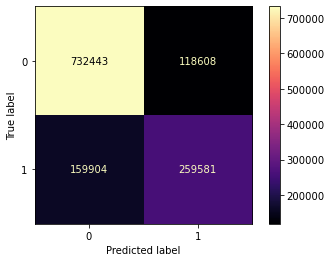

In [110]:
matriz_tree = ConfusionMatrixDisplay(confusion_matrix(y_19, y_pred_19_cb))

matriz_tree.plot(cmap='magma')

### Salvando o modelo

In [111]:
import pickle

# salavando o modelo
filename = 'finalized_model.sav'
pickle.dump(cb_model, open(filename, 'wb'))

# Aplicando o Modelo na base de alunos ativos (não supervisionado)

In [112]:
# diretório das bases
PATH_19 = r'C:\Users\rafsa\OneDrive\Documentos\01 Microcenso Educação Superior\Bases\Microdados_Educacao_Superior_2019\dados'

# Leitura da base ALUNO 2019
file = '\SUP_ALUNO_2019.CSV'
df_aluno_ativo = pd.DataFrame()

In [113]:
start = time.time()

for chunk in pd.read_csv(PATH_19+file, sep='|', dtype={10: str, 11: str}, chunksize=250000):
    df_aluno_ativo = pd.concat([df_aluno_ativo, chunk.query('IN_FINANCIAMENTO_ESTUDANTIL == 1 & TP_SITUACAO == 2')])
    
end = time.time()
print("Concatenando os pedaços no DataFrame: ",(end-start),"seg")

Concatenando os pedaços no DataFrame:  141.37275981903076 seg


In [114]:
df_aluno_ativo.shape

(2565168, 105)

In [115]:
# Leitura da base CINE
# file = '\TB_AUX_CINE_BRASIL_2019.CSV'

# df_cine_19 = pd.read_csv(PATH_19+file, sep='|', encoding='ansi')

In [116]:
key_vars_ativo = ['CO_ALUNO_CURSO']

drop_vars_ativo = [
    'CO_IES', 'CO_CURSO', 'CO_CURSO_POLO', 'TP_NIVEL_ACADEMICO', 'ID_ALUNO',  
    'NU_ANO_NASCIMENTO', 'NU_MES_NASCIMENTO', 'NU_DIA_NASCIMENTO', 'CO_PAIS_ORIGEM', 'CO_UF_NASCIMENTO', 
    'CO_MUNICIPIO_NASCIMENTO', 'TP_SITUACAO', 'DT_INGRESSO_CURSO', 'TP_SEMESTRE_CONCLUSAO', 'TP_SEMESTRE_REFERENCIA', 
    'CO_IES_DESTINO', 'CO_PAIS_DESTINO', 'IN_ALUNO_PARFOR', 'TP_NACIONALIDADE', 'IN_BOLSA_ESTAGIO', 
    'IN_BOLSA_EXTENSAO', 'IN_BOLSA_MONITORIA', 'IN_BOLSA_PESQUISA', 'IN_APOIO_ALIMENTACAO', 'IN_APOIO_BOLSA_PERMANENCIA', 
    'IN_APOIO_BOLSA_TRABALHO', 'IN_APOIO_MATERIAL_DIDATICO', 'IN_APOIO_MORADIA', 'IN_APOIO_TRANSPORTE',
    'IN_COMPLEMENTAR_ESTAGIO', 'IN_COMPLEMENTAR_EXTENSAO', 'IN_COMPLEMENTAR_MONITORIA', 'IN_COMPLEMENTAR_PESQUISA',
    'IN_RESERVA_ETNICO', 'IN_RESERVA_DEFICIENCIA', 'IN_RESERVA_ENSINO_PUBLICO',
    'IN_RESERVA_RENDA_FAMILIAR', 'IN_RESERVA_OUTRA', 'IN_INGRESSO_TOTAL', 
    'IN_INGRESSO_PROCESSO_SELETIVO', 'IN_INGRESSO_VAGA_NOVA', 'IN_DEFICIENCIA_AUDITIVA', 
    'IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_INTELECTUAL', 'IN_DEFICIENCIA_MULTIPLA', 
    'IN_DEFICIENCIA_SURDEZ', 'IN_DEFICIENCIA_SURDOCEGUEIRA', 'IN_DEFICIENCIA_BAIXA_VISAO',
    'IN_DEFICIENCIA_CEGUEIRA', 'IN_DEFICIENCIA_SUPERDOTACAO', 'IN_TGD_AUTISMO', 'IN_TGD_SINDROME_ASPERGER',
    'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO', 'TP_MOBILIDADE_ACADEMICA', 'TP_MOBILIDADE_ACADEMICA_INTERN',
    'IN_FINANCIAMENTO_ESTUDANTIL', 'QT_CARGA_HORARIA_INTEG', 'IN_MATRICULA', 'TP_MODALIDADE_ENSINO']

to_be_grouped_vars_ativo = ['CO_CINE_ROTULO']

cat_vars_ativo = [
    'TP_CATEGORIA_ADMINISTRATIVA', 'TP_ORGANIZACAO_ACADEMICA', 'TP_TURNO', 'TP_GRAU_ACADEMICO', 
    'TP_COR_RACA',  'TP_ESCOLA_CONCLUSAO_ENS_MEDIO']

cat_vars_bool_ativo = ['TP_SEXO']

num_vars_ativo = ['QT_CARGA_HORARIA_TOTAL', 'NU_IDADE']

ingresso_vars_ativo = ['IN_INGRESSO_VESTIBULAR', 'IN_INGRESSO_ENEM'] 

ingresso_outros_vars_ativo = [    
    'IN_INGRESSO_AVALIACAO_SERIADA', 'IN_INGRESSO_SELECAO_SIMPLIFICA',
    'IN_INGRESSO_OUTRO_TIPO_SELECAO', 'IN_INGRESSO_VAGA_REMANESC', 'IN_INGRESSO_VAGA_PROG_ESPECIAL',
    'IN_INGRESSO_TRANSF_EXOFFICIO', 'IN_INGRESSO_DECISAO_JUDICIAL', 'IN_INGRESSO_CONVENIO_PECG',
    'IN_INGRESSO_EGRESSO', 'IN_INGRESSO_OUTRA_FORMA']

financ_vars_ativo = [
    'IN_FIN_REEMB_FIES', 'IN_FIN_REEMB_PROG_IES', 
    'IN_FIN_NAOREEMB_PROUNI_INTEGR', 'IN_FIN_NAOREEMB_PROUNI_PARCIAL', 'IN_FIN_NAOREEMB_PROG_IES']

financ_reemb_outro_vars_ativo = [
    'IN_FIN_REEMB_ESTADUAL', 'IN_FIN_REEMB_MUNICIPAL',
    'IN_FIN_REEMB_ENT_EXTERNA', 'IN_FIN_REEMB_OUTRA']

financ_nao_reemb_outro_vars_ativo = [
    'IN_FIN_NAOREEMB_ESTADUAL', 'IN_FIN_NAOREEMB_MUNICIPAL',
    'IN_FIN_NAOREEMB_ENT_EXTERNA', 'IN_FIN_NAOREEMB_OUTRA']

deriv_vars_ativo = [
    'IN_DEFICIENCIA', 'IN_RESERVA_VAGAS', 
    'IN_APOIO_SOCIAL', 'IN_ATIVIDADE_EXTRACURRICULAR', 'IN_MOBILIDADE_ACADEMICA']

new_features_vars_ativo = ['NU_ANO_CENSO', 'NU_ANO_INGRESSO', 'CO_ALUNO_CURSO_ORIGEM']

created_vars_ativo = []

target_ativo = ['IN_CONCLUINTE']

In [117]:
# # Unificando os alunos com mais de uma matrícula
df_aluno_ativo = df_aluno_ativo.sort_values('NU_ANO_INGRESSO')

df_aluno_ativo.drop_duplicates(subset=['ID_ALUNO'], keep='first', inplace=True)

### Mantendo apenas os alunos iniciantes

In [118]:
df_aluno_ativo[['QT_CARGA_HORARIA_INTEG', 'QT_CARGA_HORARIA_TOTAL']]

,QT_CARGA_HORARIA_INTEG,QT_CARGA_HORARIA_TOTAL
4908960,2294,3260
441780,420,3700
446265,3340,3610
1915876,1540,4560
3552588,2778,3825
...,...,...
7088853,1040,3240
7088850,2000,3240
7088849,1040,3240
7087885,3200,3240


In [119]:
df_aluno_ativo['RATIO_QT_CARGA_HORARIA'] = df_aluno_ativo['QT_CARGA_HORARIA_INTEG'] / df_aluno_ativo['QT_CARGA_HORARIA_TOTAL']
df_aluno_ativo['RATIO_QT_CARGA_HORARIA']

4908960    0.70368
441780     0.11351
446265     0.92521
1915876    0.33772
3552588    0.72627
             ...  
7088853    0.32099
7088850    0.61728
7088849    0.32099
7087885    0.98765
12346701   0.00000
Name: RATIO_QT_CARGA_HORARIA, Length: 2545954, dtype: float64

<AxesSubplot:>

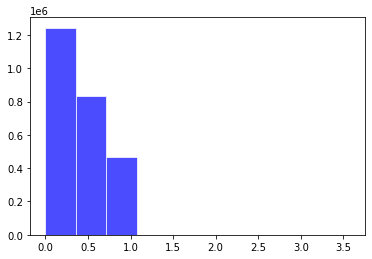

In [120]:
df_aluno_ativo['RATIO_QT_CARGA_HORARIA'].hist(bins=10, color='blue', alpha=0.7, 
                  grid=False, edgecolor='white', linewidth=1)

### Filtrando apenas os alunos que estão até na primeira metade do curso (até 50% da carga horária cumprida)

In [121]:
df_aluno_ativo = df_aluno_ativo.query('RATIO_QT_CARGA_HORARIA < 0.51')

In [122]:
df_aluno_ativo.drop(columns='RATIO_QT_CARGA_HORARIA', inplace=True)

In [123]:
# Descartando colunas iniciais
df_abt_aluno_ativo = df_aluno_ativo.drop(columns=drop_vars_ativo)

# Agrupando os outros tipos de ingresso
df_abt_aluno_ativo['IN_INGRESSO_OUTRO'] = np.where(df_abt_aluno_ativo[ingresso_outros_vars_ativo].sum(axis=1) > 0.0, 1, 0)
df_abt_aluno_ativo.drop(columns=ingresso_outros_vars_ativo, inplace=True)

created_vars_ativo.append('IN_INGRESSO_OUTRO')

# Agrupando os outros tipos de financiamento
df_abt_aluno_ativo = (
    df_abt_aluno_ativo
    .assign(
        IN_FIN_REEMB_OUTRO = np.where(df_aluno_ativo[financ_reemb_outro_vars_ativo].sum(axis=1) > 0.0, 1.0, 0.0),
        IN_FIN_NAO_REEMB_OUTRO = np.where(df_aluno_ativo[financ_nao_reemb_outro_vars_ativo].sum(axis=1) > 0.0, 1.0, 0.0)
    )
)

df_abt_aluno_ativo.drop(columns=financ_reemb_outro_vars_ativo+financ_nao_reemb_outro_vars_ativo, inplace=True)

[created_vars_ativo.append(c) for c in ['IN_FIN_REEMB_OUTRO', 'IN_FIN_NAO_REEMB_OUTRO']]

# Criando a feature NO_CINE_AREA_GERAL
df_abt_aluno_ativo = (
    df_abt_aluno_ativo
    .merge(df_cine_19[['CO_CINE_ROTULO', 'CO_CINE_AREA_GERAL']], how='left', on='CO_CINE_ROTULO')
)

created_vars_ativo.append('CO_CINE_AREA_GERAL')

# Criando a variável de Anos desde Ingresso
# df_abt_aluno_ativo['FT_PERIODO_ANOS_INGRESSO'] = df_abt_aluno_ativo['NU_ANO_CENSO'] - df_abt_aluno_ativo['NU_ANO_INGRESSO']

# created_vars_ativo.append('FT_PERIODO_ANOS_INGRESSO')

# Featureas a serem consideradas
df_abt_aluno_ativo = df_abt_aluno_ativo[
    cat_vars_ativo
    +cat_vars_bool_ativo
    +num_vars_ativo
    +ingresso_vars_ativo
    +financ_vars_ativo
    +deriv_vars_ativo
    +created_vars_ativo
    +target_ativo]

features_ativo = df_abt_aluno_ativo.drop(columns=target_ativo).columns

X_ativo = df_abt_aluno_ativo[features_ativo]
y_ativo = df_abt_aluno_ativo[target_ativo]

# Adicionando Área CINE como variável categórica
cat_vars_ativo.append('CO_CINE_AREA_GERAL')

# Treino
# Antes do OHE, transformam-se as variáveis em tipo Texto e depois aplica o OHE
X_ativo[cat_vars_ativo] = X_ativo[cat_vars_ativo].astype(str)
X_ativo_cat_ohe = ohe.transform(X_ativo[cat_vars_ativo])

# Base apenas com as variáveis numéricas

# Treino
X_ativo_num = X_ativo.drop(columns=cat_vars_ativo)
X_ativo_lr = pd.concat([X_ativo_num, X_ativo_cat_ohe], axis='columns')

# Convertendo para os melhores tipos
X_ativo_lrn = X_ativo_lr.convert_dtypes()

C:\Users\rafsa\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [124]:
num_cols_ativo = X_ativo_num.columns

sc_trans_ativo = scaler.transform(X_ativo_lrn[num_cols_ativo])

# Treino
X_ativo_num_scaled = pd.DataFrame(sc_trans_ativo, columns=num_cols_ativo)

# realinhando os índices das tabelas
X_ativo_num_scaled = X_ativo_num_scaled.set_index(X_ativo_lrn.index)

X_ativo_cat_ohe = X_ativo_cat_ohe.set_index(X_ativo_lrn.index)

X_ativo_lrn_scaled = pd.concat([X_ativo_num_scaled, X_ativo_cat_ohe], axis='columns')

In [125]:
# aplicando na base real
y_pred_ativo_cb = cb_model.predict(X_ativo_lrn_scaled)

In [126]:
y_pred_ativo_cb = cb_model.predict(X_ativo_lrn_scaled)

# Resultado da base de alunos ativos de 2019 (sem a resposta)

In [127]:
# base total
len(y_pred_ativo_cb)

1647901

In [128]:
# adicionando a resposta na base
df_abt_aluno_ativo['IN_PREDITO'] = y_pred_ativo_cb

In [129]:
# Resultado da base de alunos ativos de 2019 (absoluto)
df_abt_aluno_ativo['IN_PREDITO'].value_counts()

0    1359548
1     288353
Name: IN_PREDITO, dtype: int64

In [130]:
# Resultado da base de alunos ativos de 2019 (relativo)
df_abt_aluno_ativo['IN_PREDITO'].value_counts(normalize=True)

0   0.82502
1   0.17498
Name: IN_PREDITO, dtype: float64

# Importância das variáveis

In [131]:
import matplotlib.pyplot as plt

importances = pd.DataFrame(data={
    'Attribute': X_test_lrn_scaled.columns,
    'Importance': cb_model.feature_importances_
})
importances = importances.sort_values(by='Importance')

In [132]:
importances.sort_values(by='Importance', ascending=False)

,Attribute,Importance
1,QT_CARGA_HORARIA_TOTAL,33.06372
2,NU_IDADE,20.66363
5,IN_FIN_REEMB_FIES,5.60241
25,TP_TURNO_0.0,4.25912
12,IN_APOIO_SOCIAL,3.87757
9,IN_FIN_NAOREEMB_PROG_IES,3.09909
13,IN_ATIVIDADE_EXTRACURRICULAR,2.85740
47,CO_CINE_AREA_GERAL_9,2.29978
18,TP_CATEGORIA_ADMINISTRATIVA_4,1.90299
6,IN_FIN_REEMB_PROG_IES,1.59537


### Shap Values

In [133]:
import shap

In [134]:
explainer = shap.TreeExplainer(cb_model)

In [135]:
shap_values = explainer.shap_values(X_test_lrn_scaled)

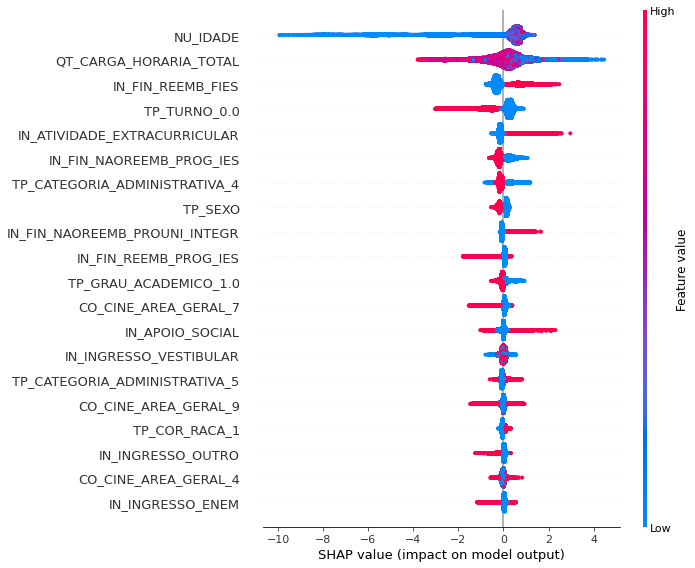

In [136]:
shap.summary_plot(shap_values, X_test_lrn_scaled)